#### the Athletes dataset :

 - ID: A number used as a unique identifier for each athlete
- Name: The athlete’s name(s) in the form of First Middle Last where available
- Sex: The athlete’s gender; one of M or F 
-  Age: The athlete’s age in years
- Height: The athlete’s height in centimeters (cm)
- Weight: The athlete’s weight in kilograms (kg)
- Team: The name of the team that the athlete competed for
- NOC: The National Organizing Committee’s 3-letter code
- Games: The year and season of the Olympics the athlete competed in in the format YYYY Season
- Year: The year of the Olympics that the athlete competed in
- Season: The season of the Olympics that the athlete competed in
- City: The city that hosted the Olympics that the athlete competed in
- Sport: The sport that the athlete competed in
- Event: The event that the athlete competed in
- Medal: The medal won by the athlete; one of Gold, Silver, or Bronze. NA if no medal was won.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv("F:\python DS\\athlete_events.csv")
df2= pd.read_csv("F:\python DS\\noc_regions.csv")

In [3]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df1.shape

(271116, 15)

In [6]:
df1.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
df2.describe(
)

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,TAN,Germany,Individual Olympic Athletes
freq,1,4,1


In [9]:
df= pd.merge(df1, df2, on='NOC', how='left')

In [10]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
df.shape

(271116, 17)

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

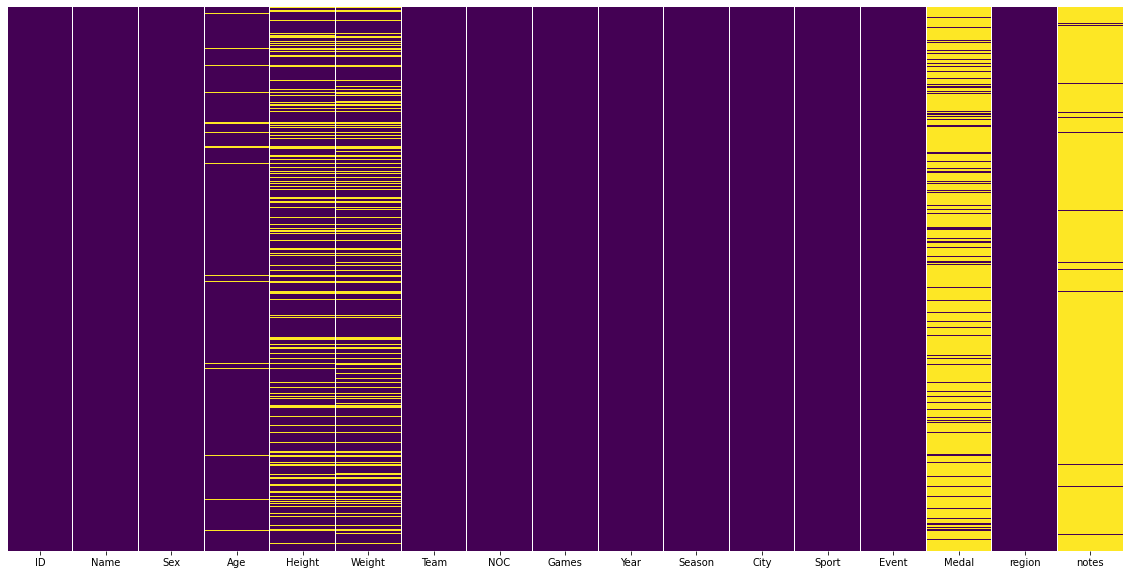

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [14]:
#pip install missingno

<AxesSubplot:>

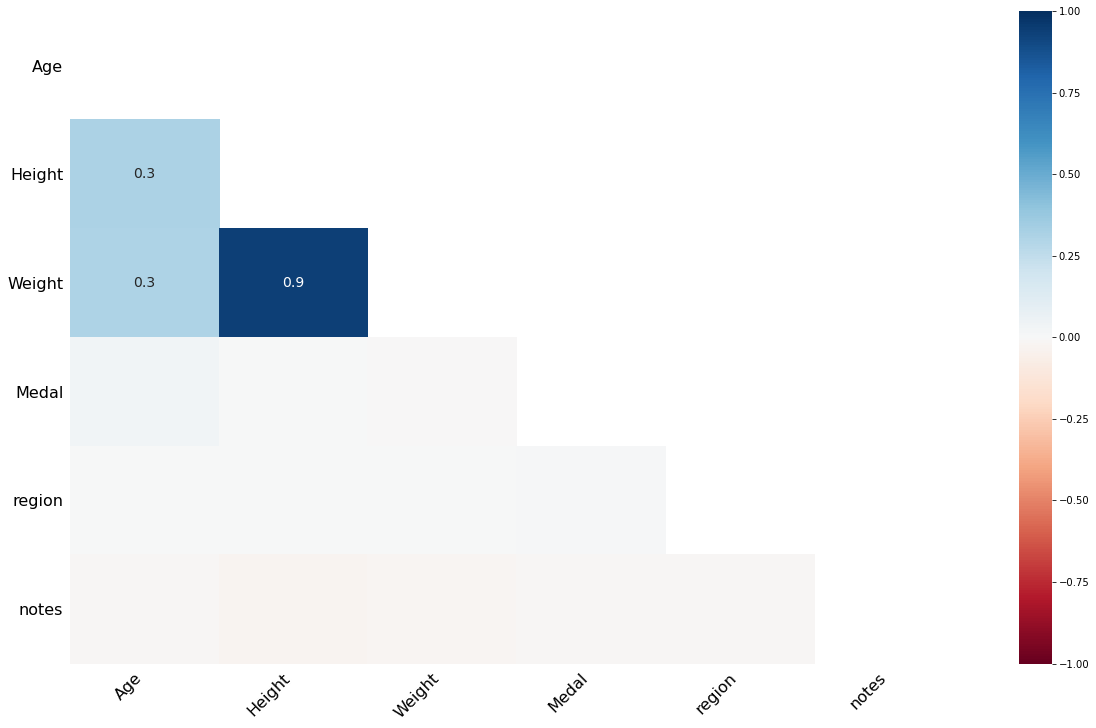

In [15]:
#Missing value correlation
import missingno as msno
msno.heatmap(df)

In [16]:
print(df["Age"].mean())
print(df["Age"].median())
print(df["Age"].mode())

25.556898357297374
24.0
0    23.0
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


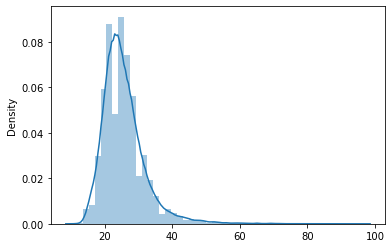

In [17]:
sns.distplot(x=df["Age"])
plt.show()

In [18]:
df["Age"]=df["Age"].fillna(df["Age"].median())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


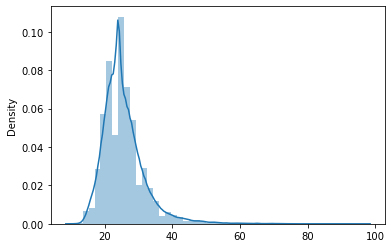

In [19]:
sns.distplot(x=df["Age"])
plt.show()

In [20]:
### Corelation with Null values

In [21]:
# def impute_nan(df,variable,medians):
#     df[variable+"_median"] = df[variable].fillna(median)

In [22]:
# median=df.Age.median()

In [23]:
#median

In [24]:
# impute_nan(df,"Age",median)

In [25]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# df['Age'].plot(kind='kde', ax=ax)
# df.Age.plot(kind='kde', ax=ax, color='red')
# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines, labels, loc='best')

In [26]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [27]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [28]:
### Hight
print("Mean of Height",df["Height"].mean())
print("Mode of Height",df["Height"].median())
print("Median of Height",df["Height"].mode())

Mean of Height 175.33896987366376
Mode of Height 175.0
Median of Height 0    180.0
dtype: float64


In [29]:
df["Height"]=df["Height"].fillna(df["Height"].mean(),inplace=False)

In [30]:
### Weight
print("Mean of weight",df["Weight"].mean())
print("Mode of weight",df["Weight"].median())
print("Median of weight",df["Weight"].mode())

Mean of weight 70.70239290053351
Mode of weight 70.0
Median of weight 0    70.0
dtype: float64


In [31]:
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

In [32]:
#Replace NA in Medal column with None
df['Medal'] = df['Medal'].fillna("None")
df['Medal'].head()

0    None
1    None
2    None
3    Gold
4    None
Name: Medal, dtype: object

In [33]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

In [34]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [35]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

In [36]:
# sns.pairplot(df)
#plt.show()

In [37]:
# df.Age.plot(kind='hist')
# plt.plot()

In [38]:
# df.Height.plot(kind='hist')
# plt.plot()

In [39]:
# df.Weight.plot(kind='hist')
# plt.plot()

In [40]:
# plt.scatter(df["Age"] , df["Height"])
# plt.show()

In [41]:
# plt.scatter(df["Age"] , df["Weight"])
# plt.show()

In [42]:
# plt.scatter(df["Height"] , df["Weight"])
# plt.show()

In [43]:
# plt.figure(figsize=(20,8))

# plt.subplot(1,2,1)
# plt.title("Height DIstribution")
# sns.distplot(df.Height)

# plt.subplot(1,2,2)
# plt.title("Age_ Spread")
# sns.boxplot(y=df.Age)

# plt.show()

#### The dataset in pretty structured and clear.

- ID is the Unique indentifier of every participant.
- NOC is the National Olympic committe of their country.
- Team is the name of team that participated, generally it is name of country, but it might have old country names/ countries before partition etc and most importantly it ha team names of individual participants also
- Lets see the Count of Team names and NOC.

In [44]:
print("Number of Nationalites ---",len(df["NOC"].unique()))
print("Number of Teams-----------",len(df["Team"].unique()))

Number of Nationalites --- 230
Number of Teams----------- 1184


In [45]:
print("Number of unique ID----------",len(df["ID"].unique()))

Number of unique ID---------- 135571


#### You might be wondering that len(df) is 271116 which is more than number of players, it's because a single player might participate in different events and also in multiple olympics.

In [46]:
#### Look at the medal Distribution
df["Medal"].value_counts()

None      231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

Quite obvious that Gold,Silver and Bronze are almost equal

#### What is the unique count of sports, events, and different city, and the team participatedin the Olympics.

In [47]:
print("Number of unique sports:",len(df.Sport.unique()))
print("Number of unique Event:",len(df.Event.unique()))
print("Number of unique City:",len(df.City.unique()))
print("Number of unique Team:",len(df.Team.unique()))

Number of unique sports: 66
Number of unique Event: 765
Number of unique City: 42
Number of unique Team: 1184


#### What is the total count of players from the United States, China, Netherland, Spain,France, Italy?

In [48]:
df.groupby(['region'])["ID"].count()

region
Afghanistan                126
Albania                     70
Algeria                    551
American Samoa              37
Andorra                    169
                          ... 
Virgin Islands, British     45
Virgin Islands, US         294
Yemen                       48
Zambia                     183
Zimbabwe                   323
Name: ID, Length: 205, dtype: int64

In [49]:
#["USA","China","Netherland","Spain","France","Italy"]

In [50]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [51]:
print(df["City"].unique())

['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


In [52]:
print(df["region"].unique())

['China' 'Denmark' 'Netherlands' 'USA' 'Finland' 'Norway' 'Romania'
 'Estonia' 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy'
 'Chad' 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus'
 'Greece' 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Virgin Islands, US' 'Sri Lanka' 'Armenia'
 'Ivory Coast' 'Kenya' 'Benin' 'Ukraine' 'UK' 'Ghana' 'Somalia' 'Latvia'
 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica' 'Panama' 'Georgia'
 'Slovenia' 'Croatia' 'Guyana' 'N

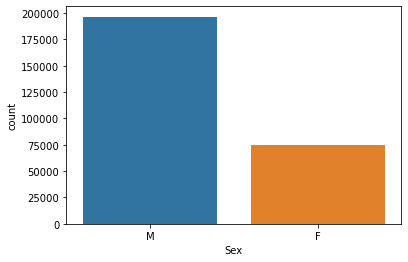

In [53]:
sns.countplot(x='Sex',data=df)
plt.show()

In [54]:
df["Season"].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [55]:
import numpy as np

In [56]:
print("SUMMER OLYMPICS WERE CONDUCTED IN ",np.array(sorted(df[df['Season'] == 'Summer']['Year'].unique())))

SUMMER OLYMPICS WERE CONDUCTED IN  [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012
 2016]


In [57]:
print("WINTER OLYMPICS WERE CONDUCTED IN ",np.array(sorted(df[df['Season'] == 'Winter']['Year'].unique())))

WINTER OLYMPICS WERE CONDUCTED IN  [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006 2010 2014]


####  Male Vs Female Participation in Olympic from the year 1896 - 2016

In [58]:
groupedYearID = df.groupby(['Year','ID'],as_index=False).count()[['Year','ID']]

In [59]:
groupedYearID = groupedYearID.groupby('Year',as_index=False).count()

In [60]:
groupedYearID.head()

,Year,ID
0,1896,176
1,1900,1224
2,1904,650
3,1906,841
4,1908,2024


In [61]:
df.groupby(by=['Year',"Sex"])["Sex"].count()

Year  Sex
1896  M       380
1900  F        33
      M      1903
1904  F        16
      M      1285
             ... 
2012  M      7105
2014  F      2023
      M      2868
2016  F      6223
      M      7465
Name: Sex, Length: 69, dtype: int64

In [62]:
groupedregionID = df.groupby(['region','ID'],as_index=False).count()[['region','ID']]

In [63]:
groupedregionID = groupedregionID.groupby('region',as_index=False).count()

In [64]:
groupedregionID.head()

,region,ID
0,Afghanistan,103
1,Albania,45
2,Algeria,373
3,American Samoa,29
4,Andorra,61


In [65]:
for i in df['region'].unique():
    print(i)

China
Denmark
Netherlands
USA
Finland
Norway
Romania
Estonia
France
Morocco
Spain
Egypt
Iran
Bulgaria
Italy
Chad
Azerbaijan
Sudan
Russia
Argentina
Cuba
Belarus
Greece
Cameroon
Turkey
Chile
Mexico
Nicaragua
Hungary
Nigeria
Algeria
Kuwait
Bahrain
Pakistan
Iraq
Syria
Lebanon
Qatar
Malaysia
Germany
Canada
Ireland
Australia
South Africa
Eritrea
Tanzania
Jordan
Tunisia
Libya
Belgium
Djibouti
Palestine
Comoros
Kazakhstan
Brunei
India
Saudi Arabia
Maldives
Ethiopia
United Arab Emirates
Yemen
Indonesia
Philippines
nan
Uzbekistan
Kyrgyzstan
Tajikistan
Japan
Republic of Congo
Switzerland
Brazil
Monaco
Israel
Uruguay
Sweden
Virgin Islands, US
Sri Lanka
Armenia
Ivory Coast
Kenya
Benin
Ukraine
UK
Ghana
Somalia
Latvia
Niger
Mali
Afghanistan
Poland
Costa Rica
Panama
Georgia
Slovenia
Croatia
Guyana
New Zealand
Portugal
Paraguay
Angola
Venezuela
Colombia
Bangladesh
Peru
El Salvador
Puerto Rico
Uganda
Honduras
Ecuador
Turkmenistan
Mauritius
Seychelles
Czech Republic
Luxembourg
Mauritania
Saint Kitts
Trin

In [66]:
#### Club the winter olympics after 1992 to its next summer olympics.

In [67]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN


In [68]:
#### Sports Type
df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [69]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [70]:
df.groupby(["region",'Sex'])["Name"].count()

region       Sex
Afghanistan  F        5
             M      121
Albania      F       27
             M       43
Algeria      F       94
                   ... 
Yemen        M       44
Zambia       F       19
             M      164
Zimbabwe     F      114
             M      209
Name: Name, Length: 410, dtype: int64

In [71]:
# In [170]: df['ID'] = df.groupby('col1')['col2'].transform(lambda x: pd.factorize(x)[0])


In [72]:
##### Find Unique id
#df.groupby().nunique()
#df.groupby().agg()
#df.groupby().unique()

In [73]:
groupedregion = df.groupby(['region','ID'],as_index=False).count()[['region','ID']]
groupedregion = groupedregion.groupby('region',as_index=False).count()

In [74]:
groupedregion

,region,ID
0,Afghanistan,103
1,Albania,45
2,Algeria,373
3,American Samoa,29
4,Andorra,61
...,...,...
200,"Virgin Islands, British",28
201,"Virgin Islands, US",150
202,Yemen,43
203,Zambia,145


In [75]:
Total_players = df.groupby(['region'])['ID'].count()
pd.DataFrame(Total_players)
Total_players = Total_players.reset_index(drop=False)
Total_players = Total_players.sort_values(by = ['ID'], ascending = False)
Total_players = Total_players.head()


In [76]:
Total_players

,region,ID
191,USA,18853
67,Germany,15883
63,France,12758
190,UK,12256
151,Russia,11692


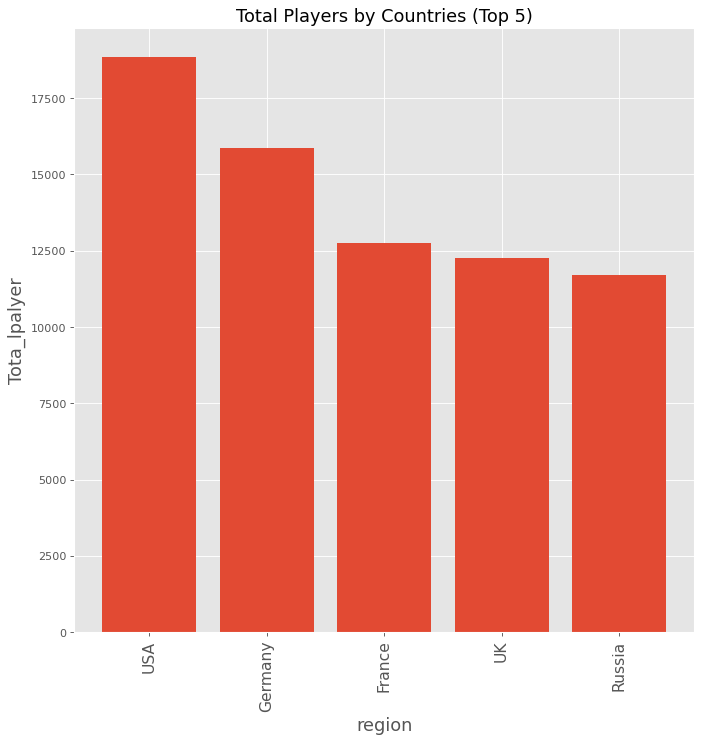

In [77]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

with plt.style.context('ggplot'):
    plt.bar('region','ID',data = Total_players)
    plt.xlabel('region', fontsize = 16)
    plt.ylabel('Tota_lpalyer', fontsize = 16)
    plt.title('Total Players by Countries (Top 5)', fontsize = 16)
    plt.xticks(Total_players['region'], rotation=90, fontsize = 14)
plt.show()

In [78]:
Total_players = df.groupby(['region'])['ID'].count()
pd.DataFrame(Total_players)
Total_players = Total_players.reset_index(drop=False)
Total_players = Total_players.sort_values(by = ['ID'], ascending = False)
Total_players = Total_players.head()


In [79]:
grouped_year = df.groupby(["Year"])["ID"].count()
pd.DataFrame(grouped_year)
grouped_year = grouped_year.reset_index(drop=False)
grouped_year = grouped_year.sort_values(by = ["ID"])
grouped_year.head()

,Year,ID
0,1896,380
2,1904,1301
3,1906,1733
1,1900,1936
4,1908,3101


In [80]:
Medal_Types = df.groupby(['region', 'Medal'])['Medal'].count()
Medal_Types = Medal_Types.unstack(level = -1)
pd.DataFrame(Medal_Types)
Medal_Types = Medal_Types.reset_index(drop=False)
Medal_Types = Medal_Types.sort_values(by = ['Gold'], ascending = False)
Medal_Types = Medal_Types.head(20)
Medal_Types

Medal,region,Bronze,Gold,None,Silver
191,USA,1358.0,2638.0,13216.0,1641.0
151,Russia,1178.0,1599.0,7745.0,1170.0
67,Germany,1260.0,1301.0,12127.0,1195.0
190,UK,651.0,678.0,10188.0,739.0
87,Italy,531.0,575.0,9078.0,531.0
63,France,666.0,501.0,10981.0,610.0
176,Sweden,535.0,479.0,6803.0,522.0
33,Canada,451.0,463.0,8382.0,438.0
78,Hungary,371.0,432.0,5472.0,332.0
135,Norway,294.0,378.0,3927.0,361.0


In [81]:
### Which Team has won most Gold medal

In [82]:
gold_medals = df["Medal"] == "Gold"
df.loc[gold_medals,"Team"].value_counts()

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
                 ... 
Puerto Rico         1
Mozambique          1
Tajikistan          1
Femur-1             1
Israel              1
Name: Team, Length: 242, dtype: int64

In [83]:
### which team has won most bronze Model

In [84]:
bronze_medals = df["Medal"] == "Bronze"
df.loc[bronze_medals,"Team"].value_counts()

United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
                 ... 
Frimousse           1
Guyana              1
Barbados            1
Monaco              1
Clearwater          1
Name: Team, Length: 268, dtype: int64

In [85]:
#### WHich team has won Most SIlver Models

In [86]:
silver_medals = df["Medal"] == "Silver"
df.loc[silver_medals,"Team"].value_counts()

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
                 ... 
Sudan               1
Tonga               1
Syria               1
Costa Rica          1
Ghana               1
Name: Team, Length: 273, dtype: int64

What is the total count of players from the United States, China, Netherland, Spain,
France, Italy?

In [87]:
#### USA
united_states_player = df["region"] == "USA"
df.loc[united_states_player,"ID"].nunique()

9653

In [88]:
##### China

In [89]:
china_players = df["region"] == "China"
df.loc[china_players,"ID"].nunique()

2985

In [90]:
##### Netherlands
Netherland_players = df["region"] == "Netherlands"
df.loc[Netherland_players,'ID'].nunique()

2939

In [91]:
#### Spain
spain_players = df["region"] == "Spain"
df.loc[spain_players,'ID'].nunique()

2637

In [92]:
##### France
France_players = df["region"] == "France"
df.loc[France_players,'ID'].nunique()

6170

In [93]:
######### Italy
Italy_players = df["region"] == "Italy"
df.loc[Italy_players,'ID'].nunique()

4935

In [94]:
######### Zimbabe
Zimbabe_players = df["region"] == "Zimbabwe"
df.loc[Zimbabe_players,'ID'].nunique()

205

In [95]:
total_palyers=df["ID"].unique()

In [96]:
total_palyers=pd.DataFrame(total_palyers)

In [97]:
df.groupby(['region'])['ID'].nunique().tail(50)

region
Saint Vincent                28
Samoa                        53
San Marino                   92
Sao Tome and Principe        13
Saudi Arabia                149
Senegal                     234
Serbia                     1661
Seychelles                   64
Sierra Leone                 62
Slovakia                    457
Slovenia                    420
Solomon Islands              20
Somalia                      22
South Africa                963
South Korea                2393
South Sudan                   3
Spain                      2637
Sri Lanka                    93
Sudan                        81
Suriname                     33
Swaziland                    42
Sweden                     3787
Switzerland                2883
Syria                       206
Taiwan                      566
Tajikistan                   45
Tanzania                    110
Thailand                    462
Timor-Leste                   8
Togo                         42
Tonga                        38
T

#### What is the average age of female and male players from the United States, China,Netherland, Spain, France, Italy

In [98]:
Age_usa = df[df["region"]=="USA"]


In [99]:
 Age_usa.groupby(['Sex']).agg({'ID': ['nunique'],
                                 'Age': ['mean']})

,ID,Age
,nunique,mean
Sex,,
F,2613,24.521236
M,7040,26.640015


In [100]:
df.groupby(['Sex']).agg({'ID': ['nunique'],
                                 'Age': ['mean']})

,ID,Age
,nunique,mean
Sex,,
F,33981,23.734401
M,101590,26.172716


In [101]:
Age_china = df[df['region'] == "China"]

In [102]:
Age_china.groupby(["Sex"]).agg({"ID":["nunique"],"Age":["mean"]})

,ID,Age
,nunique,mean
Sex,,
F,1516,22.380013
M,1469,24.028229


In [103]:
age_net = df[df["region"] == "Netherlands"]
age_net.groupby(["Sex"]).agg({"ID":["nunique"],"Age":["mean"]})

,ID,Age
,nunique,mean
Sex,,
F,864,24.156965
M,2075,27.847765


In [104]:
age_France = df[df["region"] == "France"]
age_France.groupby(["Sex"]).agg({"ID":["nunique"],"Age":["mean"]})

,ID,Age
,nunique,mean
Sex,,
F,1157,24.172959
M,5013,27.148943


In [105]:
age_Italy = df[df["region"] == "Italy"]
age_Italy.groupby(["Sex"]).agg({"ID":["nunique"],"Age":["mean"]})

,ID,Age
,nunique,mean
Sex,,
F,1032,23.566654
M,3903,26.505507


In [106]:
df = pd.concat([df,pd.get_dummies(df.Medal)],axis=1)

In [107]:
df['allmedals'] = df['allmedals'] = df['Bronze'] + df['Gold'] + df['Silver'] 
#Obviously it would be either 1 or 0. Added this column to make analysis easier

In [108]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,None,China,NaN,0,0,1,0,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,None,China,NaN,0,0,1,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,None,Denmark,NaN,0,0,1,0,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN,0,0,1,0,0


In [109]:
df.allmedals.value_counts()

0    231333
1     39783
Name: allmedals, dtype: int64

#### comapring diffrent types of medal won by Team


In [110]:
Medal_Types = df.groupby(['region', 'Medal'])['Medal'].count()
Medal_Types = Medal_Types.unstack(level = -1)
pd.DataFrame(Medal_Types)
Medal_Types = Medal_Types.reset_index(drop=False)
Medal_Types = Medal_Types.sort_values(by = ['Gold'], ascending = False)
Medal_Types = Medal_Types.head(20)
Medal_Types


Medal,region,Bronze,Gold,None,Silver
191,USA,1358.0,2638.0,13216.0,1641.0
151,Russia,1178.0,1599.0,7745.0,1170.0
67,Germany,1260.0,1301.0,12127.0,1195.0
190,UK,651.0,678.0,10188.0,739.0
87,Italy,531.0,575.0,9078.0,531.0
63,France,666.0,501.0,10981.0,610.0
176,Sweden,535.0,479.0,6803.0,522.0
33,Canada,451.0,463.0,8382.0,438.0
78,Hungary,371.0,432.0,5472.0,332.0
135,Norway,294.0,378.0,3927.0,361.0


### What are the names of players who have brought gold, silver and bronze medal?

In [111]:
Name_Types = df.groupby(['Name', 'Medal'])['Medal'].count()
Name_Types = Name_Types.unstack(level = -1)
pd.DataFrame(Name_Types)
Name_Types = Name_Types.reset_index(drop=False)
Name_Types = Name_Types.sort_values(by = ['Gold'], ascending = False)
Name_Types= Name_Types.head()
Name_Types

Medal,Name,Bronze,Gold,None,Silver
86745,"Michael Fred Phelps, II",2.0,23.0,2.0,3.0
104057,"Raymond Clarence ""Ray"" Ewry",NaN,10.0,NaN,NaN
97002,Paavo Johannes Nurmi,NaN,9.0,NaN,3.0
73140,Larysa Semenivna Latynina (Diriy-),4.0,9.0,1.0,5.0
83112,Mark Andrew Spitz,1.0,9.0,1.0,1.0


## Which Sport wins the Maixumum Medals in the Olympics event

In [112]:
Sports_Medals = df.groupby(['Sport', 'Medal'])['Medal'].count()
Sports_Medals = Sports_Medals.unstack(level = -1)
pd.DataFrame(Medal_Types)
Sports_Medals = Sports_Medals.reset_index(drop=False)
Sports_Medals = Sports_Medals.sort_values(by = ['Gold'], ascending = False)
Sports_Medals = Sports_Medals.head(20)
Sports_Medals.head(10)

Medal,Sport,Bronze,Gold,None,Silver
5,Athletics,1296.0,1339.0,34655.0,1334.0
54,Swimming,956.0,1099.0,20147.0,993.0
43,Rowing,990.0,978.0,7650.0,977.0
27,Gymnastics,719.0,791.0,24451.0,746.0
22,Fencing,566.0,594.0,8992.0,583.0
29,Hockey,512.0,518.0,3889.0,498.0
24,Football,543.0,515.0,5174.0,513.0
30,Ice Hockey,507.0,508.0,3986.0,515.0
46,Sailing,367.0,450.0,5354.0,415.0
19,Cycling,414.0,424.0,9596.0,425.0


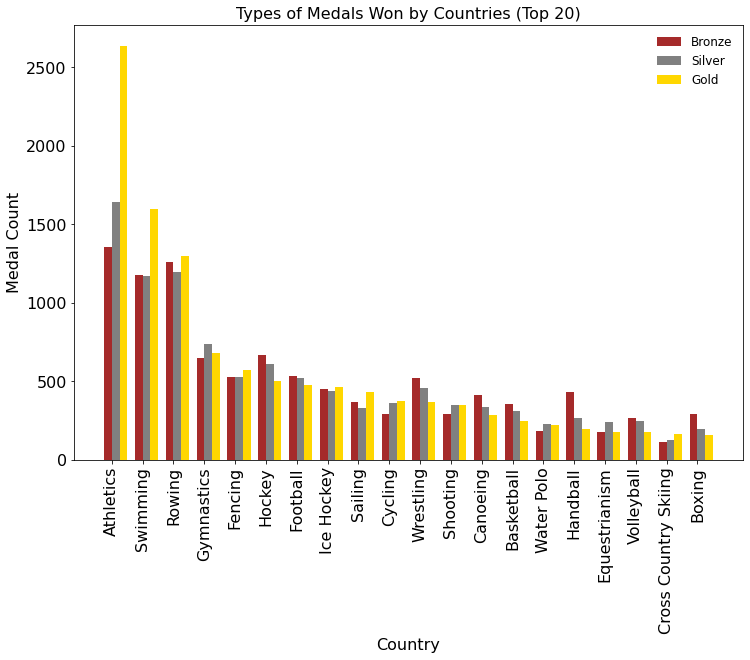

In [113]:
X_axis = Sports_Medals['Sport']
configs = Sports_Medals['Sport']
N = len(configs)
ind = np.arange(N)
width = 0.25
fig = plt.figure(figsize=(12,8))

bar_1 = plt.bar(ind, Medal_Types['Bronze'], width, color='brown' )
bar_2 = plt.bar(ind + width, Medal_Types['Silver'], width, color='grey')
bar_3 = plt.bar(ind + width + width, Medal_Types['Gold'], width, color='gold')

plt.yticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.xticks(ind + width/2, X_axis, fontsize=16, rotation=90)
plt.xlabel('Country', fontsize=16)
plt.title('Types of Medals Won by Countries (Top 20)',fontsize=16)
plt.legend((bar_1[0], bar_2[0], bar_3[0]), ('Bronze', 'Silver', 'Gold'), fontsize=12, ncol=1, framealpha=0, fancybox=True)
plt.show()

### Trends of Medal from 1896 to 2016

In [114]:
Medals_Year = df.groupby(['Year', 'Medal'])['Medal'].count().reset_index(name='count')
# Medals_Year = Medals_Year.unstack(level = -1)
pd.DataFrame(Medals_Year)
# Medals_Year = Medals_Year.reset_index(drop=False)
Medals_Year.head(10)

,Year,Medal,count
0,1896,Bronze,38
1,1896,Gold,62
2,1896,None,237
3,1896,Silver,43
4,1900,Bronze,175
5,1900,Gold,201
6,1900,None,1332
7,1900,Silver,228
8,1904,Bronze,150
9,1904,Gold,173


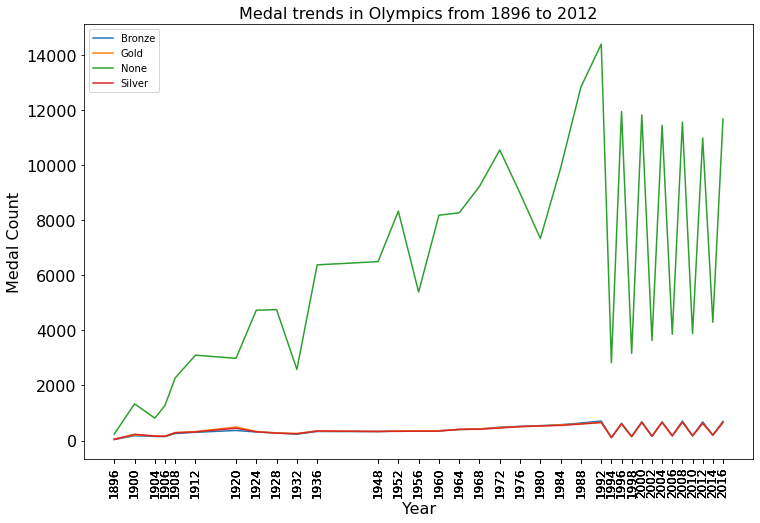

In [115]:
fig = plt.figure(figsize=(12,8))
ax = sns.lineplot(x = 'Year', y = 'count', hue = 'Medal', data = Medals_Year)
ax.legend(loc='upper left')

plt.yticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.xticks(Medals_Year['Year'], fontsize=12, rotation=90)
plt.xlabel('Year', fontsize=16)
plt.title('Medal trends in Olympics from 1896 to 2012',fontsize=16)
plt.show()

### Where was the olympics held in each of the years under consideration?

In [116]:
df[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Athina
3,1900,Paris
711,1904,St. Louis
268,1906,Athina
1149,1908,London
35,1912,Stockholm
2,1920,Antwerpen
672,1924,Chamonix
39,1924,Paris
133,1928,Amsterdam


In [117]:
#df.to_csv("complete_athletic.csv")

16. Which city has the maximum number of players?

In [118]:
Max_no_Players = df.groupby(['City'])["ID"].nunique()

In [119]:
Max_no_Players .sort_values(ascending=False).head()

City
London            16941
Athina            11556
Rio de Janeiro    11179
Beijing           10899
Sydney            10647
Name: ID, dtype: int64

In [120]:
df.groupby(['City'])["ID"].nunique().sort_values(ascending=False).head()

City
London            16941
Athina            11556
Rio de Janeiro    11179
Beijing           10899
Sydney            10647
Name: ID, dtype: int64

#### Which olympic year had the highest number of olympians participating?

In [121]:
most_oympicpar=df.groupby("Year")["Name"].nunique()

In [122]:
most_oympicpar.sort_values(ascending = False).head()

Year
2016    11174
1992    11172
2008    10880
2000    10639
2004    10537
Name: Name, dtype: int64

Below is a pie chart representation of top 5 years with the hightest number of olympians participating;

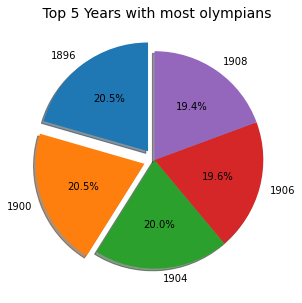

In [123]:
#Pie chart representation of top 5 years with the hightest number of olympians participating
plt.figure(figsize = (10,5))
Top_5 = most_oympicpar.sort_values(ascending = False).head(5)
Top_5_indx = most_oympicpar.head(5).index
explode = [0.1,0.1,0,0,0]

plt.pie(Top_5,labels=Top_5_indx,autopct='%1.1f%%', startangle=90,shadow = True,explode = explode)

plt.title(" Top 5 Years with most olympians",fontsize= 14);

### How many teams have participated in Olympics?

In [124]:
df["Team"].nunique()

1184

### What is the number of teams that have been participating in every olympic year?

In [125]:
df.groupby("Year")["Team"].nunique()

Year
1896     18
1900    190
1904     79
1906     52
1908     73
1912    102
1920     72
1924     93
1928     85
1932     72
1936    132
1948    131
1952    155
1956    149
1960    196
1964    199
1968    145
1972    157
1976    126
1980    111
1984    179
1988    211
1992    239
1994    101
1996    246
1998    106
2000    243
2002    114
2004    260
2006    113
2008    292
2010    116
2012    245
2014    119
2016    249
Name: Team, dtype: int64

In [126]:
first_olympic =df [df.Year.isin([1896])]
first_olympic

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
3079,1724,Aristidis Akratopoulos,M,24.0,175.33897,70.702393,Greece,GRE,1896 Summer,1896,...,Tennis,Tennis Men's Singles,None,Greece,NaN,0,0,1,0,0
3080,1724,Aristidis Akratopoulos,M,24.0,175.33897,70.702393,Greece-3,GRE,1896 Summer,1896,...,Tennis,Tennis Men's Doubles,None,Greece,NaN,0,0,1,0,0
3081,1725,"Konstantinos ""Kostas"" Akratopoulos",M,24.0,175.33897,70.702393,Greece,GRE,1896 Summer,1896,...,Tennis,Tennis Men's Singles,None,Greece,NaN,0,0,1,0,0
3082,1725,"Konstantinos ""Kostas"" Akratopoulos",M,24.0,175.33897,70.702393,Greece-3,GRE,1896 Summer,1896,...,Tennis,Tennis Men's Doubles,None,Greece,NaN,0,0,1,0,0
7348,4113,Anastasios Andreou,M,24.0,175.33897,70.702393,Greece,GRE,1896 Summer,1896,...,Athletics,Athletics Men's 110 metres Hurdles,None,Greece,NaN,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270473,135285,Khristos Zoumis,M,24.0,175.33897,70.702393,Greece,GRE,1896 Summer,1896,...,Athletics,Athletics Men's Triple Jump,None,Greece,NaN,0,0,1,0,0
270914,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,175.33897,70.702393,Switzerland,SUI,1896 Summer,1896,...,Gymnastics,Gymnastics Men's Horse Vault,Silver,Switzerland,NaN,0,0,0,1,1
270915,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,175.33897,70.702393,Switzerland,SUI,1896 Summer,1896,...,Gymnastics,Gymnastics Men's Parallel Bars,Silver,Switzerland,NaN,0,0,0,1,1
270916,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,175.33897,70.702393,Switzerland,SUI,1896 Summer,1896,...,Gymnastics,Gymnastics Men's Horizontal Bar,None,Switzerland,NaN,0,0,1,0,0


In [127]:
first_olympic.nunique()

ID           176
Name         176
Sex            1
Age           20
Height        14
Weight        13
Team          18
NOC           12
Games          1
Year           1
Season         1
City           1
Sport          9
Event         43
Medal          4
region        12
notes          0
Bronze         2
Gold           2
None           2
Silver         2
allmedals      2
dtype: int64

#### Who is the tallest and shortest player?

In [128]:
#Get name and age of Tallest olympian
df[["Name","Height"]].sort_values("Height",ascending = False).head(5) #View first five rows

,Name,Height
265040,Yao Ming,226.0
265041,Yao Ming,226.0
265042,Yao Ming,226.0
32376,Tommy Loren Burleson,223.0
207375,Arvydas Romas Sabonis,223.0


In [129]:
#Get name and age of Shortest olympian
df[["Name","Height"]].sort_values("Height",ascending = True).head(10) #View first five rows

,Name,Height
164821,Lyton Levison Mphande,127.0
29334,Rosario Briones,127.0
29335,Rosario Briones,127.0
29333,Rosario Briones,127.0
29338,Rosario Briones,127.0
29337,Rosario Briones,127.0
29336,Rosario Briones,127.0
180615,Helman Palije,128.0
220270,Boston Simbeye,130.0
159934,Salvador Miranda,130.0


 ### Q3: Who is the oldest Olympian in olympics history?

In [130]:
#Get name and age of oldest olympian
df[["Name","Age"]].sort_values("Age",ascending = False).head(5) #View first five rows

,Name,Age
257054,John Quincy Adams Ward,97.0
98118,Winslow Homer,96.0
60861,Thomas Cowperthwait Eakins,88.0
60862,Thomas Cowperthwait Eakins,88.0
60863,Thomas Cowperthwait Eakins,88.0


- The oldest olympian was John Quincy Adams Ward

In [131]:
#Get name and age of youngest olympian
df[["Name","Age"]].sort_values("Age",ascending = True).head(5) #View first five rows

,Name,Age
142882,Dimitrios Loundras,10.0
73461,Carlos Bienvenido Front Barrera,11.0
101378,Beatrice Hutiu,11.0
252233,Liana Vicens,11.0
94058,"Sonja Henie (-Topping, -Gardiner, -Onstad)",11.0


- The Youngest players was Dimitrious Loundras

In [132]:
### How old was the youngest female olympian?

In [133]:
Female_olympians = (df.Sex == "F") #Get all female olympians

In [134]:
youngest_female_olympian = df.loc[Female_olympians,"Age"].sort_values(ascending = True) #Sort their ages from the younrest to the oldest

In [135]:
youngest_female_olympian

140650    11.0
94058     11.0
252232    11.0
237141    11.0
101378    11.0
          ... 
35445     73.0
201631    74.0
201632    74.0
201633    74.0
201634    74.0
Name: Age, Length: 74522, dtype: float64

In [136]:
print("The youngest female olympians were 11 years old")

The youngest female olympians were 11 years old


In [137]:
#11 year old olympians

youngest_female_olympian = df[(df.Sex == "F") & (df.Age == 11)]

In [138]:
#Which sport had most eleven years old female olympians

youngest_female_olympian.Sport.value_counts()

Figure Skating    7
Swimming          4
Gymnastics        1
Name: Sport, dtype: int64

- Most eleven years old Female olympians participated in Figure Skating Sport

In [139]:
# Teams that have had youngest female olympians

youngest_female_olympian["Team"].unique()#Get unique elements from Eleven_year_old_female_olympians Team Column

array(['Great Britain', 'Italy', 'Norway', 'Romania', 'Japan', 'China',
       'South Africa', 'Puerto Rico'], dtype=object)

### How old was the Oldest female olympian?

In [140]:
oldest_female_olympian = df.loc[Female_olympians,"Age"].sort_values(ascending = False) #Sort their ages from the younrest to the oldest

In [141]:
oldest_female_olympian

201631    74.0
201633    74.0
201634    74.0
201632    74.0
35445     73.0
          ... 
140650    11.0
101378    11.0
43468     11.0
252230    11.0
237141    11.0
Name: Age, Length: 74522, dtype: float64

In [142]:
print("The oldest female olympians were 74 years old")

The oldest female olympians were 74 years old


In [143]:
#11 year old olympians

oldest_female_olympian = df[(df.Sex == "F") & (df.Age == 74)]

In [144]:
#Which sport had most eleven years old female olympians

oldest_female_olympian.Sport.value_counts()

Art Competitions    4
Name: Sport, dtype: int64

- Most Seventy four  old Female olympians participated in Art Competitions

#### How old was the Youngest male olympian?

In [145]:
male_olympians = (df.Sex == "M") #Get all male olympians

In [146]:
youngest_male_olympian = df.loc[male_olympians,"Age"].sort_values(ascending = True) #Sort their ages from the younrest to the oldest

In [147]:
youngest_male_olympian 

142882    10.0
73461     11.0
46955     12.0
97086     12.0
79352     12.0
          ... 
60862     88.0
60861     88.0
60863     88.0
98118     96.0
257054    97.0
Name: Age, Length: 196594, dtype: float64

In [148]:
print("The Youngest male olympians were 11 years old")

The Youngest male olympians were 11 years old


In [149]:
### 11 year old olympians

youngest_male_olympian = df[(df.Sex == "M") & (df.Age == 11)]

In [150]:
#Which sport had most eleven years old female olympians

youngest_male_olympian.Sport.value_counts()

Rowing    1
Name: Sport, dtype: int64

In [151]:
# Teams that have had youngest male olympians

youngest_male_olympian["Team"].unique()#Get unique elements from Eleven_year_old_female_olympians Team Column

array(['Spain'], dtype=object)

#### how old was the Youngest male olympian?¶

In [152]:
oldest_male_olympian = df.loc[male_olympians,"Age"].sort_values(ascending = False) #Sort their ages from the younrest to the oldest

In [153]:
oldest_male_olympian

257054    97.0
98118     96.0
60863     88.0
60862     88.0
60861     88.0
          ... 
84361     12.0
96665     12.0
46955     12.0
73461     11.0
142882    10.0
Name: Age, Length: 196594, dtype: float64

In [154]:
print("The Oldest male olympians were 97 years old")

The Oldest male olympians were 97 years old


In [155]:
### 11 year old olympians

oldest_male_olympian = df[(df.Sex == "M") & (df.Age == 97)]

In [156]:
#Which sport had most eleven years old female olympians

oldest_male_olympian.Sport.value_counts()

Art Competitions    1
Name: Sport, dtype: int64

In [157]:
# Teams that have had oldest male olympians

oldest_male_olympian["Team"].unique()#Get unique elements from Eleven_year_old_female_olympians Team Column

array(['United States'], dtype=object)

#### What are the average height and weight of players who participated in football, Judo,basketball?

In [158]:
print("Average Hight of football players")
df[df["Sport"] =="Football"].groupby(["Sport"])["Height"].mean()



Average Hight of football players


Sport
Football    175.382529
Name: Height, dtype: float64

In [159]:
print("Average Hight of Judo players")
df[df["Sport"] =="Judo"].groupby(["Sport"])["Height"].mean()



Average Hight of Judo players


Sport
Judo    174.308847
Name: Height, dtype: float64

In [160]:
print("Average Height of Basketball Playes")
df[df["Sport"] =="Basketball"].groupby(["Sport"])["Height"].mean()

Average Height of Basketball Playes


Sport
Basketball    188.62721
Name: Height, dtype: float64

In [161]:
print("Average Weight of Basketball Playes")
df[df["Sport"] =="Basketball"].groupby(["Sport"])["Weight"].mean()

Average Weight of Basketball Playes


Sport
Basketball    82.925629
Name: Weight, dtype: float64

In [162]:
print("Average weight of Basketball Playes")
df[df["Sport"] =="Football"].groupby(["Sport"])["Weight"].mean()

Average weight of Basketball Playes


Sport
Football    70.530644
Name: Weight, dtype: float64

In [163]:
print("Average weight of Basketball Playes")
df[df["Sport"] =="Judo"].groupby(["Sport"])["Weight"].mean()

Average weight of Basketball Playes


Sport
Judo    78.007327
Name: Weight, dtype: float64

What are the different sports played by female players? In which sport, most numbers
of female players have participated. Visualize the same

In [164]:
female_p =df[df["Sex"] == "F"]

In [165]:
female_p["Sport"].value_counts()

Athletics                    11666
Swimming                      9850
Gymnastics                    9129
Alpine Skiing                 3398
Cross Country Skiing          3385
Rowing                        2193
Speed Skating                 2081
Fencing                       2000
Biathlon                      1863
Shooting                      1724
Volleyball                    1543
Hockey                        1459
Handball                      1401
Cycling                       1394
Canoeing                      1380
Basketball                    1256
Equestrianism                 1246
Diving                        1210
Tennis                        1178
Figure Skating                1172
Judo                          1093
Archery                       1015
Football                      1012
Table Tennis                   953
Sailing                        926
Synchronized Swimming          909
Short Track Speed Skating      761
Ice Hockey                     754
Badminton           

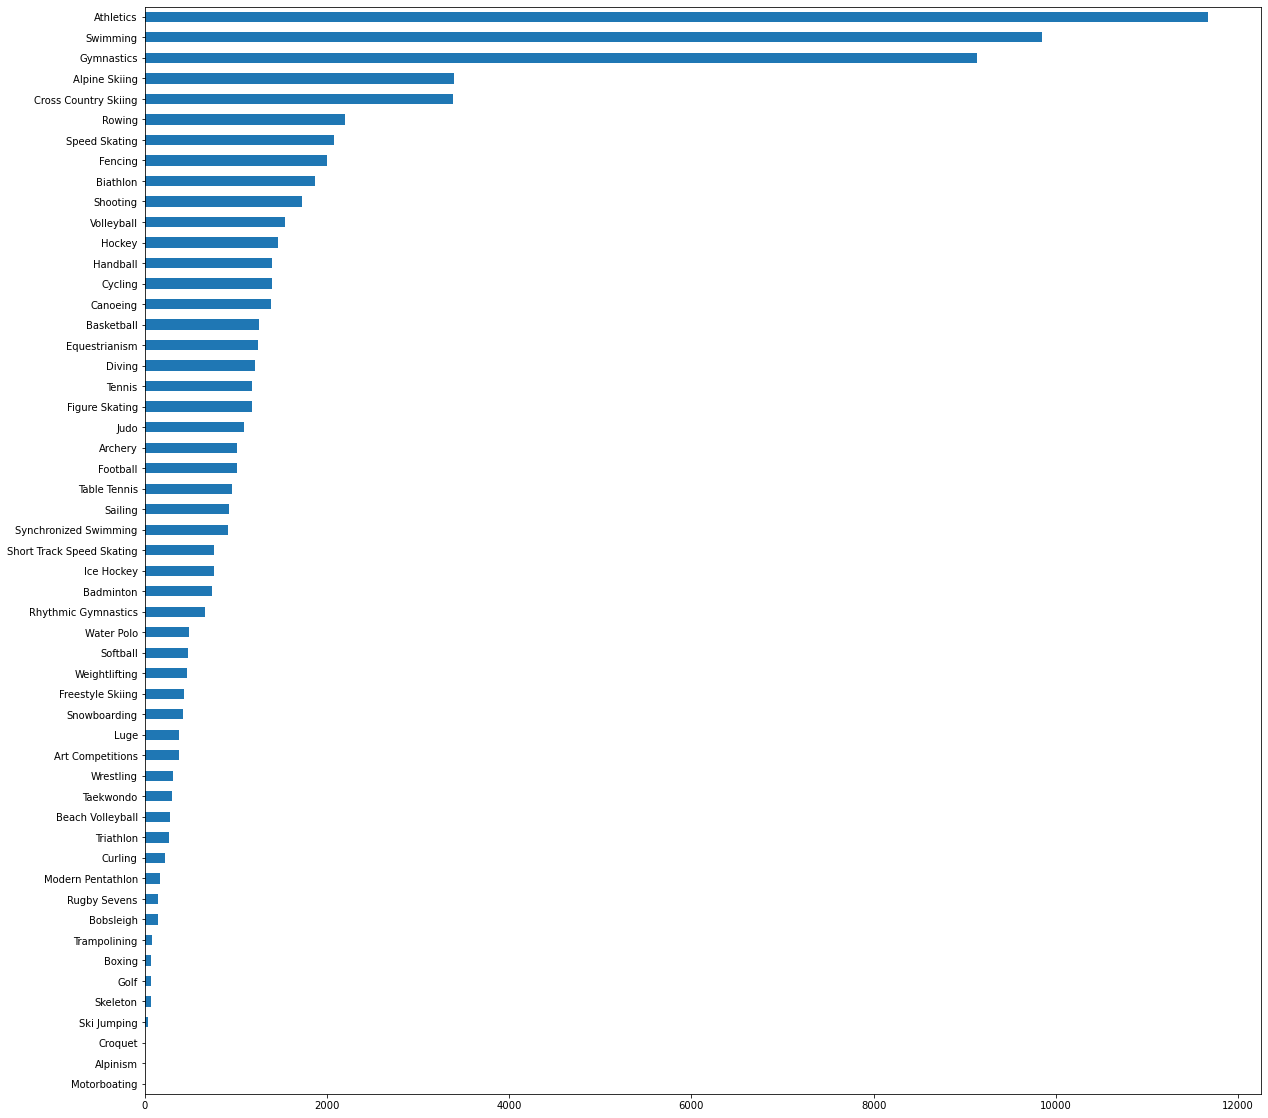

In [166]:
plt.figure(figsize=(20,20))
female_p["Sport"].value_counts(ascending=True).plot(kind = "barh")
plt.show()

In [167]:
l = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l.append(groupedYearID[groupedYearID.Year == i].index[0])

In [168]:
for i in l:
    groupedYearID.loc[i,'Year'] = groupedYearID.loc[i,'Year'] +2

In [169]:
groupedYearID = groupedYearID.groupby('Year',as_index=False).sum()

In [170]:
import matplotlib.pyplot as pyplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PARTICIPANTS')

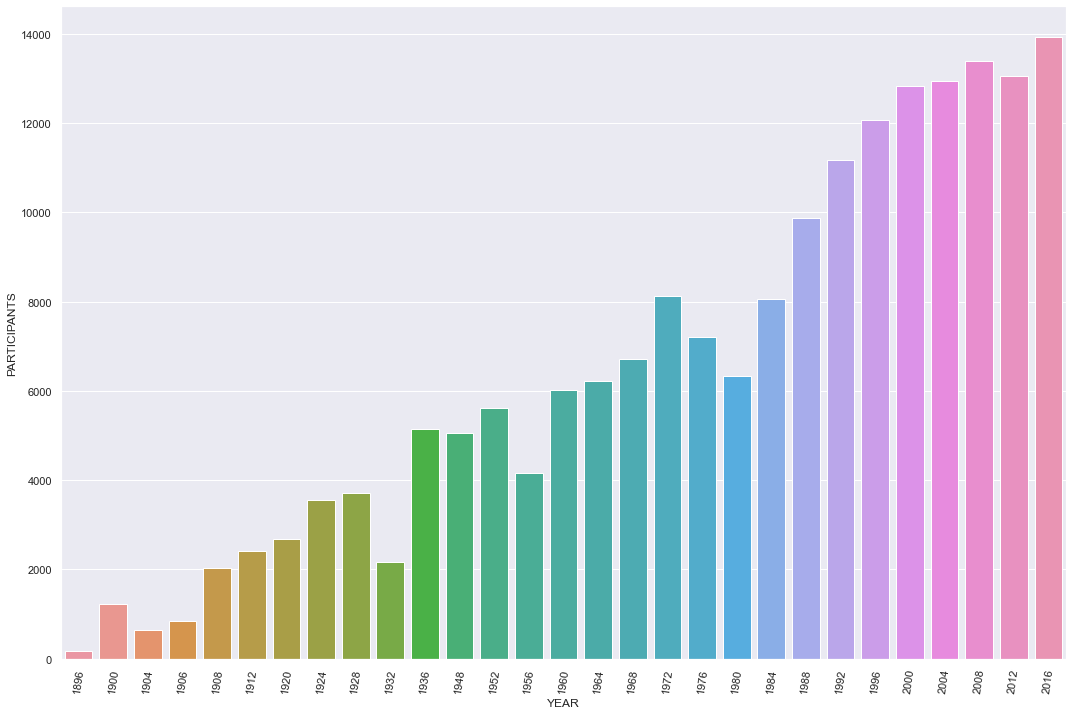

In [171]:
sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','ID',data=groupedYearID).set_xticklabels(groupedYearID.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
pyplot.xlabel("YEAR")
pyplot.ylabel("PARTICIPANTS")

#### Variation of male/female athletes over time (Summer Games)

In [172]:
MenOverTime = df[(df.Sex == 'M') & (df.Season == 'Summer')]
WomenOverTime = df[(df.Sex == 'F') & (df.Season == 'Summer')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

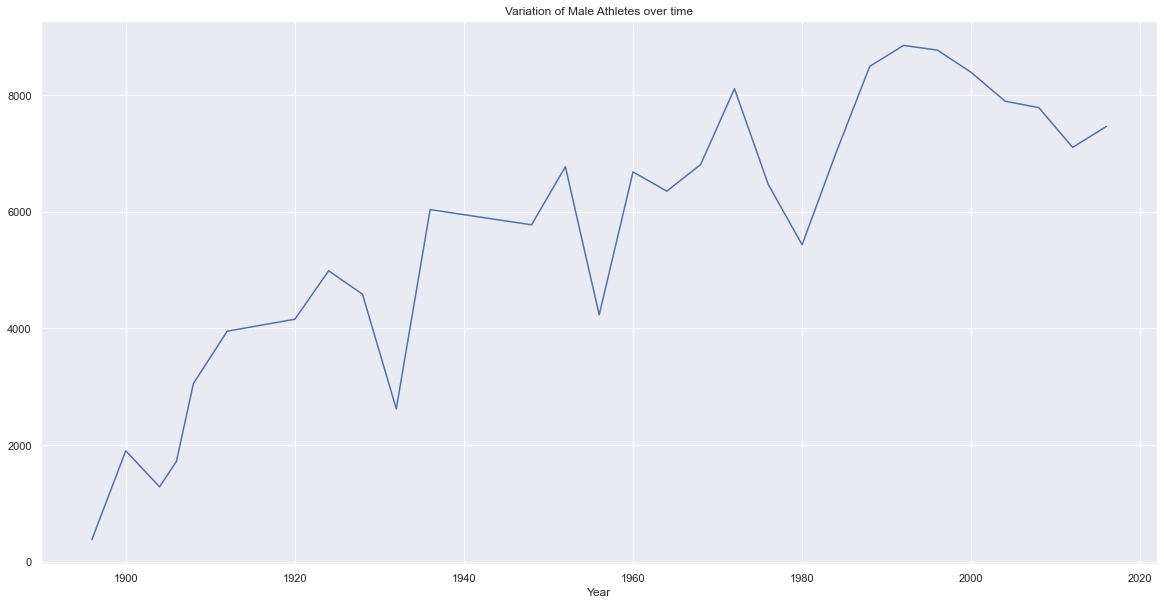

In [173]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

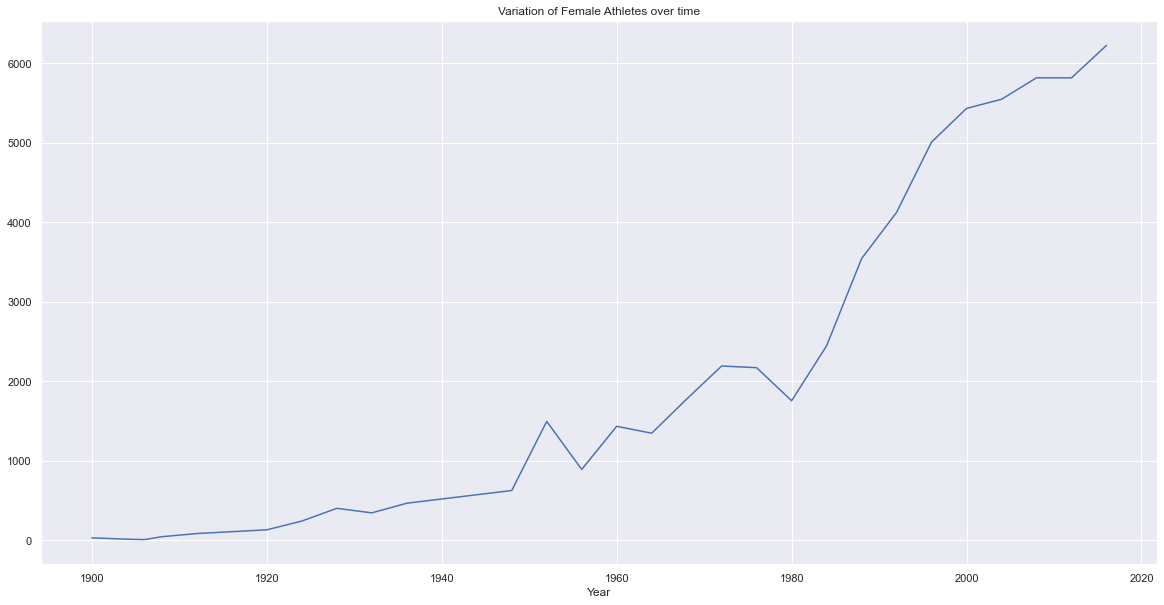

In [174]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

### Variation of male/female athletes over time (Winter Games)

In [175]:
men_winter = df[(df.Sex == "M") & (df.Season == "Winter")]
women_winter = df[(df.Sex == "F") & (df.Season == "Winter")]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

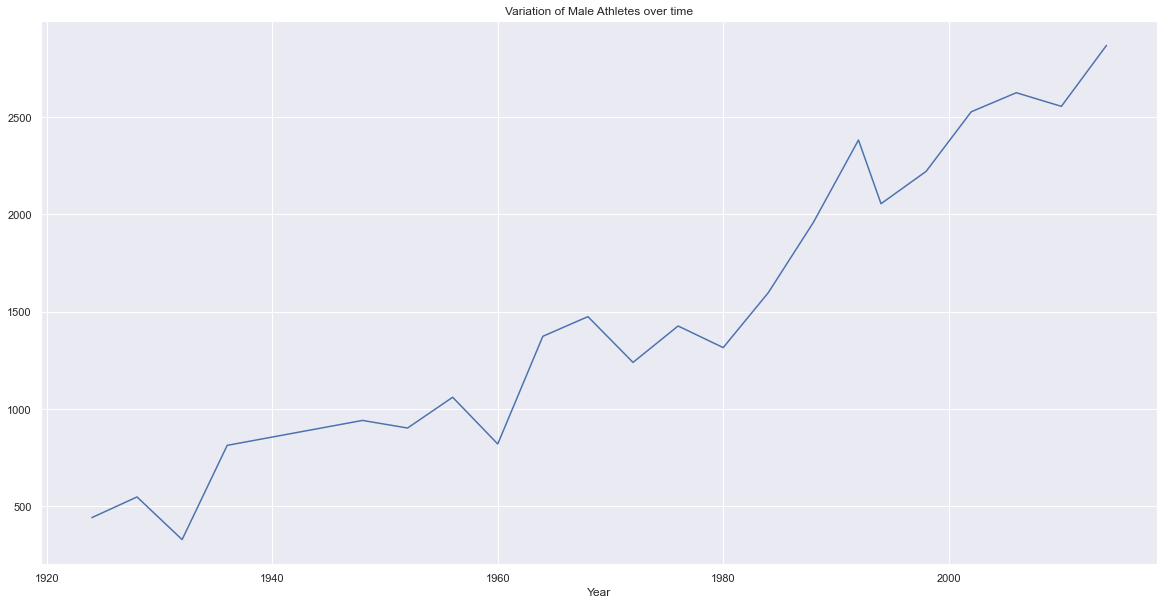

In [176]:

part =men_winter.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Male Athletes over time')

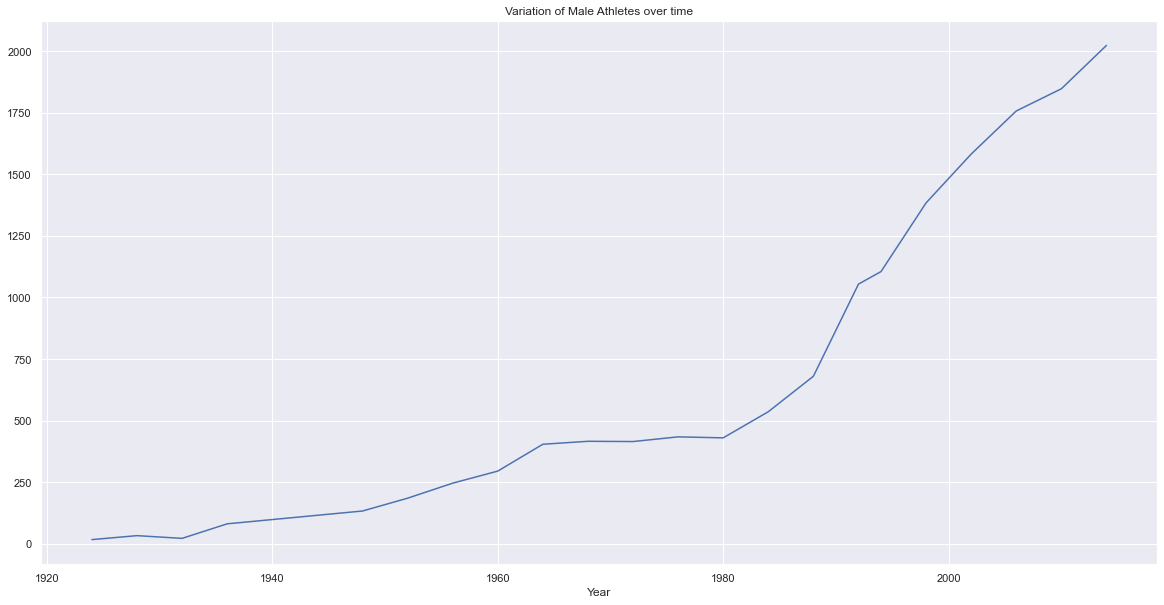

In [177]:
part =women_winter.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Male Athletes over time')

In [178]:
#### Trends of Medal from 1896 to 2012

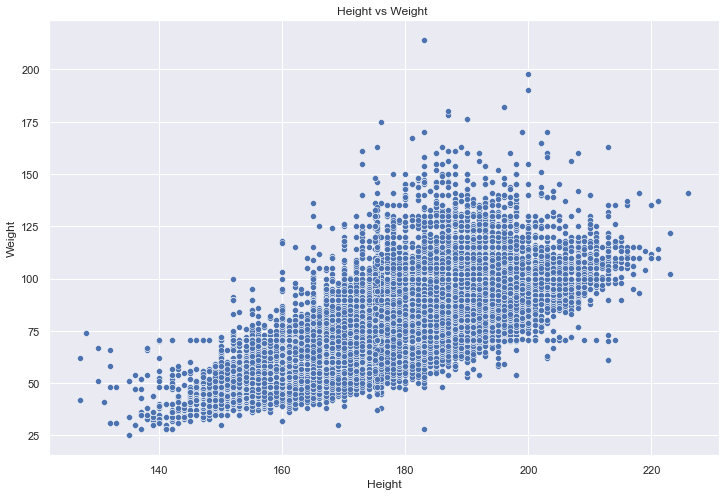

In [179]:
####
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x="Height", y="Weight", data=df)
plt.title('Height vs Weight ')
plt.show()

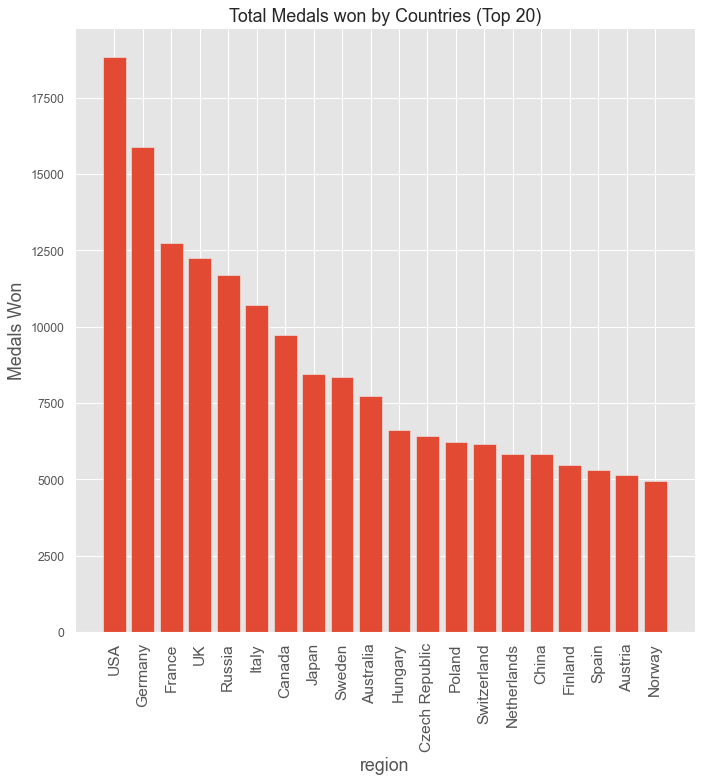

In [180]:
Total_Medals = df.groupby(['region'])['Medal'].count()
pd.DataFrame(Total_Medals)
Total_Medals = Total_Medals.reset_index(drop=False)
Total_Medals = Total_Medals.sort_values(by = ['Medal'], ascending = False)
Total_Medals = Total_Medals.head(20)
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

with plt.style.context('ggplot'):
    plt.bar('region','Medal',data = Total_Medals)
    plt.xlabel('region', fontsize = 16)
    plt.ylabel('Medals Won', fontsize = 16)
    plt.title('Total Medals won by Countries (Top 20)', fontsize = 16)
    plt.xticks(Total_Medals['region'], rotation=90, fontsize = 14)
plt.show()


####  Countries with most number of medals won in all olampic
- group by COuntries
- Sort according to number of total medals and take tp 50

In [181]:
groupcountry = df.groupby(by=['NOC'],as_index= False).sum()

In [182]:
top50 = groupcountry.sort_values(by=['allmedals'],ascending = False).head(50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


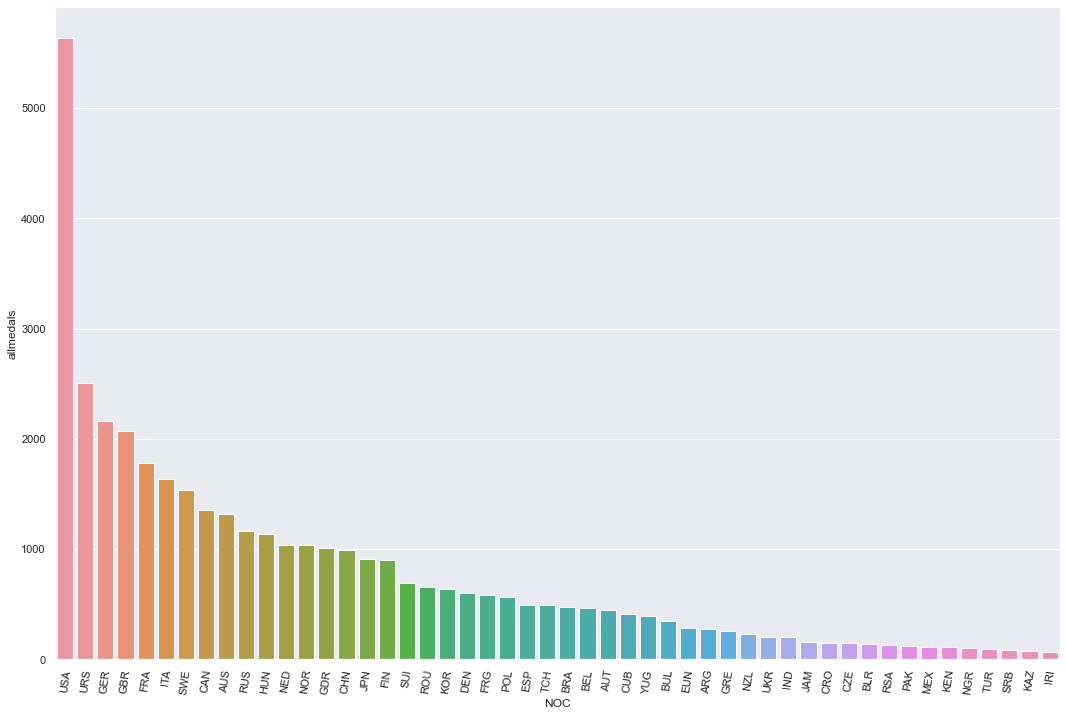

In [183]:
plot2 = sns.barplot('NOC','allmedals',data=top50).set_xticklabels(top50.NOC,rotation=82)

### Lets see the average Age,Height,Weight of players in their respective Sport

In [184]:
#### Average Age With respect to Sport


In [185]:
dfagesport = df.groupby(['Sport','ID'],as_index=False).mean()

In [186]:
dfagesport = dfagesport.groupby(['Sport'],as_index=False).mean()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


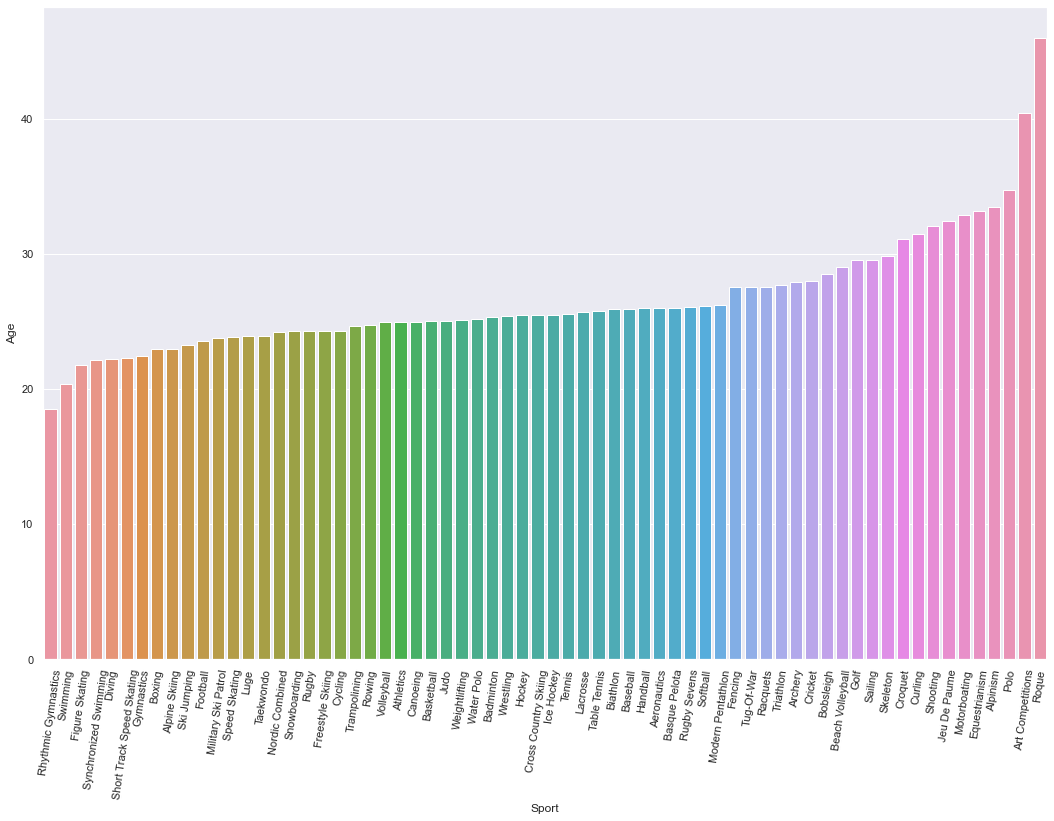

In [187]:
plot4 = sns.barplot('Sport','Age',data = dfagesport.sort_values('Age')).set_xticklabels(dfagesport.sort_values('Age').Sport,rotation=82)


In [188]:
dfheight = dfagesport[np.isfinite(dfagesport['Height'])]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


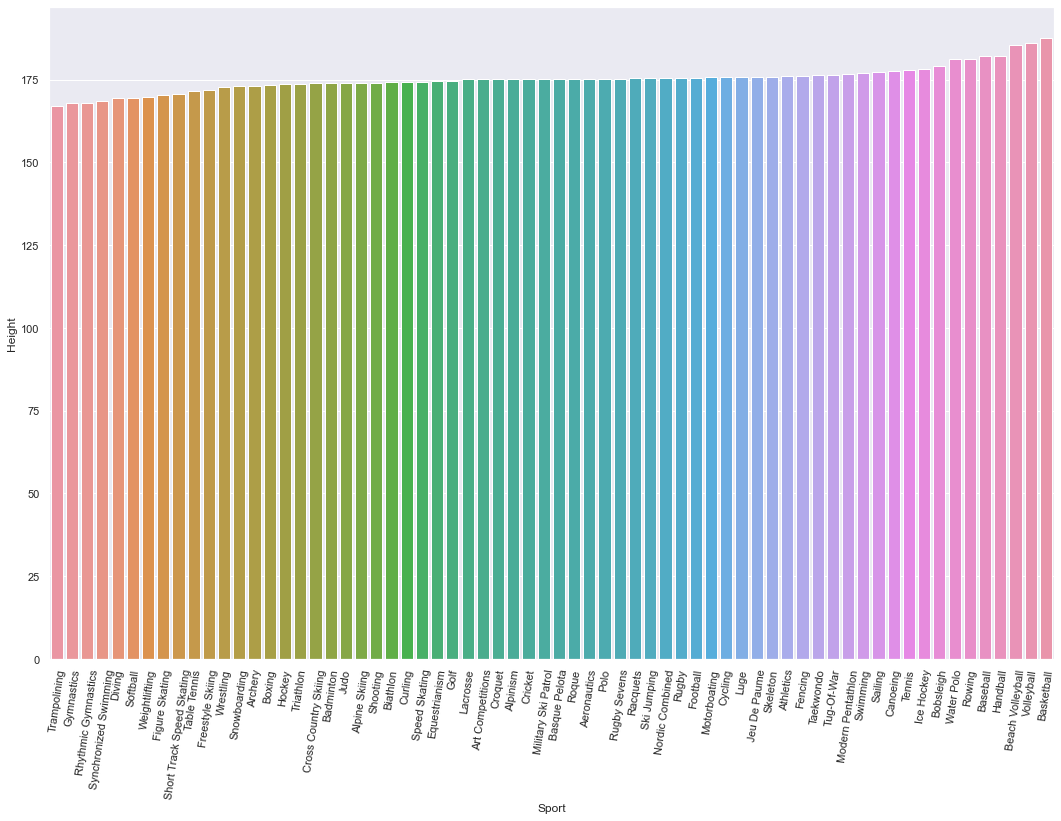

In [189]:
plot4 = sns.barplot('Sport','Height',data = dfheight.sort_values('Height')).set_xticklabels(dfheight.sort_values('Height').Sport,rotation=82)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


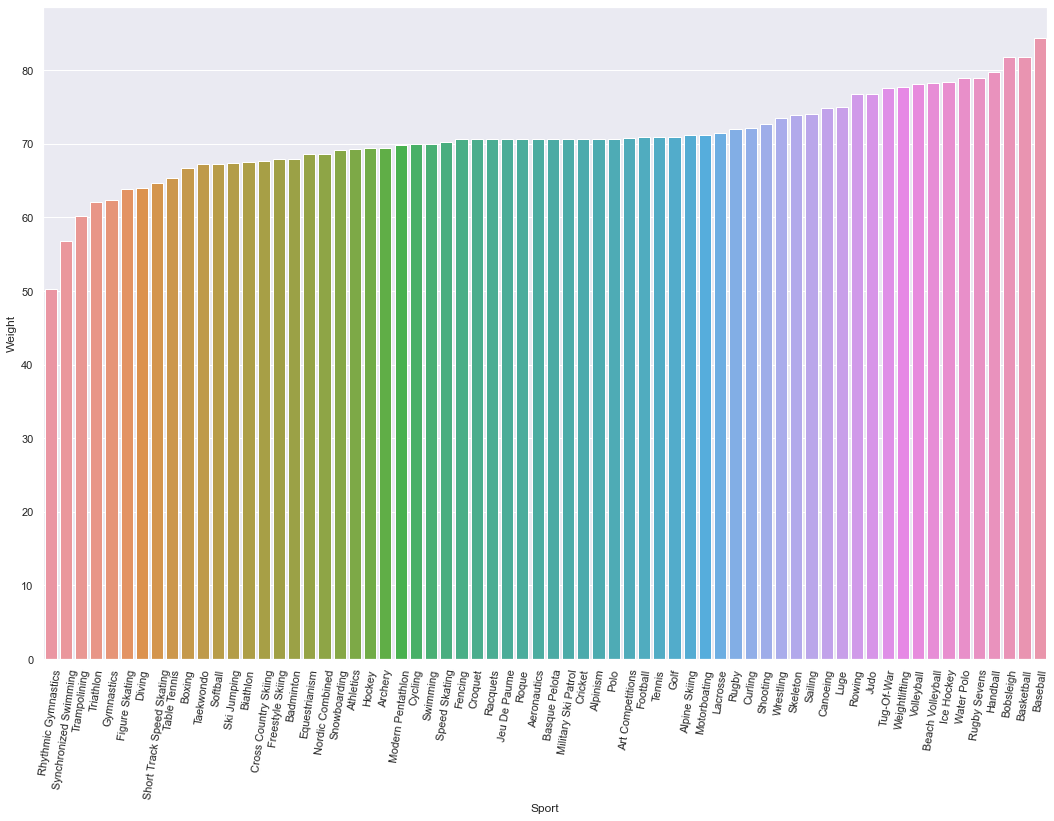

In [190]:
dfweight = dfagesport[np.isfinite(dfagesport['Weight'])]
plot4 = sns.barplot('Sport','Weight',data = dfweight.sort_values('Weight')).set_xticklabels(dfweight.sort_values('Weight').Sport,rotation=82)

##### STATS ON/OF PARTICIPANTS.

In [191]:
df.Name.value_counts()[:15]

Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
Andreas Wecker                      32
Alfrd (Arnold-) Hajs (Guttmann-)    32
Alexandros Theofilakis              32
Jean Lucien Nicolas Jacoby          32
Johann "Hans" Sauter                31
Alfred August "Al" Jochim           31
Alfred James Munnings               31
Michel Mathiot                      31
Yordan Yovchev Yovchev              30
Karl Tore William Thoresson         30
Name: Name, dtype: int64

Shocking that he appeared more than 58 times. Lets look at his stats.

The number of times he won a medal.

In [192]:
df[(df.Name == 'Robert Tait McKenzie') & (df.allmedals == 1)]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
154806,77710,Robert Tait McKenzie,M,65.0,175.33897,70.702393,Canada,CAN,1932 Summer,1932,...,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Bronze,Canada,NaN,1,0,0,0,1


Ooops! Only one medal in 58 appearances? Bad luck tho

Top 10 Players with Most number of medals

In [193]:
medals = df.groupby('Name',as_index=False).sum()

In [194]:
mostmed = medals.sort_values(by=['allmedals'],ascending=False)

In [195]:
mostmed.head(10)[['Name','Bronze','Gold','Silver','allmedals']]

,Name,Bronze,Gold,Silver,allmedals
86745,"Michael Fred Phelps, II",2,23,3,28
73140,Larysa Semenivna Latynina (Diriy-),4,9,5,18
93738,Nikolay Yefimovich Andrianov,3,7,5,15
118712,Takashi Ono,4,5,4,13
16202,Borys Anfiyanovych Shakhlin,2,7,4,13
95141,Ole Einar Bjrndalen,1,8,4,13
29509,Edoardo Mangiarotti,2,6,5,13
91718,Natalie Anne Coughlin (-Hall),5,3,4,12
111837,Sawao Kato,1,8,3,12
24893,"Dara Grace Torres (-Hoffman, -Minas)",4,4,4,12


The listed above players are top 10 (in order) players with most medals. Phelps tops the list with 28 :0¶
Lets see how many players have won more than 10 medals(inclusive).

In [196]:
print("Number of players with more than 10 Medals", len(mostmed[mostmed.allmedals >= 10]))

Number of players with more than 10 Medals 37


#### Players with most number of GOLD medals.

In [197]:
mostgold = medals.sort_values(by=['Gold'],ascending=False)
mostgold.head(10)[['Name','Gold']]

,Name,Gold
86745,"Michael Fred Phelps, II",23
104057,"Raymond Clarence ""Ray"" Ewry",10
83112,Mark Andrew Spitz,9
97002,Paavo Johannes Nurmi,9
73140,Larysa Semenivna Latynina (Diriy-),9
38069,"Frederick Carlton ""Carl"" Lewis",9
57801,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
15392,Birgit Fischer-Schmidt,8
123399,Usain St. Leo Bolt,8
95141,Ole Einar Bjrndalen,8


List of players who just lost the Gold more than 3 times in their career. By which I mean, players who have won Silver in that event.

In [198]:
mostmed[(mostmed.Silver) > (mostmed.Gold + 3)][['Name','Bronze','Gold','Silver','allmedals']]

,Name,Bronze,Gold,Silver,allmedals
37879,Franziska van Almsick,6,0,4,10
130225,Yang Yang,2,2,6,10
88187,Mikhail Yakovlevich Voronin,1,2,6,9
132337,Yury Yevlampiyevich Titov,3,1,5,9
7394,Andrea Ehrig-Schne-Mitscherlich,1,1,5,7
23794,Dagmar Hase,1,1,5,7
15838,Bogdan Musiol,1,1,5,7
77102,"Lszl Cseh, Jr.",2,0,4,6
125282,Viktor Nikitovich Lisitsky,0,0,5,5
87980,Miho Takeda,1,0,4,5


Number of people who won Medal but no Gold

In [199]:
print("Number of people who won Medal but no Gold -->",len(mostmed[((mostmed.Silver) +( mostmed.Bronze) > 1) & (mostmed.Gold == 0)]))

Number of people who won Medal but no Gold --> 2589


People who won a mimum of 5 Medals but never a Gold. (Unlucky Atheletes)

In [200]:
mostmed[((mostmed.Silver) +( mostmed.Bronze) >= 5 ) & (mostmed.Gold == 0)][['Name','Bronze','Gold','Silver','allmedals']]

,Name,Bronze,Gold,Silver,allmedals
37879,Franziska van Almsick,6,0,4,10
86301,Merlene Joyce Ottey-Page,6,0,3,9
107062,Robert Rintje Ritsma,4,0,2,6
106258,Roald Morel Larsen,4,0,2,6
46363,Harri Tapani Kirvesniemi,6,0,0,6
77102,"Lszl Cseh, Jr.",2,0,4,6
36582,"Francis Joseph Edmund ""Frank"" De Beaurepaire",3,0,3,6
101501,Piero D'Inzeo,4,0,2,6
44309,Gustav Fischer,2,0,3,5
1385,"Adrianus Egbert Willem ""Arie"" de Jong",5,0,0,5


What? Franziska van Almsick has won 10 medals but it was never a Gold.

In [201]:
df[df.Name ==  'Franziska van Almsick'].head(1)[['Name','Sex','Age','Team','Sport']]

,Name,Sex,Age,Team,Sport
247932,Franziska van Almsick,F,14.0,Germany,Swimming


### STATS OF INDIA

 - Create a new dataframe with only INDIA records.


In [202]:
dfindia = df[df.NOC == 'IND']


The years india participated in Olympics

In [203]:
sorted(dfindia.Year.unique())

[1900,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

 - Number of Medals India Won so far

In [204]:
print("Total number of all Medals India won", dfindia['allmedals'].sum())

Total number of all Medals India won 197


- But, Keep in mind that 197 medals are the medals every player won either solo or in group.But, the group event medals should be considered as only one medal. According to Olympics.
- Example: If a team won a medal in football, which has 11 players (5+ sub players), wher each will be awarded a medal, but as per olympics it is considered as only one medal.
- So, lets group them by Year and Event.

In [205]:
dfindia.groupby(['Year','Event'],as_index=False).max()['allmedals'].sum()

29

Number of Olympics medals india has 29.

### Sports in which India won a Medal.

In [206]:
set(dfindia[dfindia.allmedals == 1].Sport.unique())

{'Alpinism',
 'Athletics',
 'Badminton',
 'Boxing',
 'Hockey',
 'Shooting',
 'Tennis',
 'Weightlifting',
 'Wrestling'}

Sports in which India won a Gold

In [207]:
dfindia[dfindia.Gold == 1].Sport.unique()

array(['Hockey', 'Shooting', 'Alpinism'], dtype=object)

Look at shooting.


In [208]:
dfindia[(dfindia.Gold==1) & (dfindia.Sport == 'Shooting')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
22004,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,...,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,0,1,0,0,1


So, presenting you Abhinav Bindra, the person who won the first individual Gold for India.

Lets see which years India have won the gold in hockey.

In [209]:
dfindia[(dfindia.Gold==1) & (dfindia.Sport == 'Hockey')]['Year'].unique()

array([1928, 1964, 1932, 1936, 1980, 1948, 1952, 1956], dtype=int64)

Plotting India's performance over the years.

In [210]:
dfindyear = dfindia.groupby(['Year','Event'],as_index=False).max()

In [211]:
dfindyear = dfindyear.groupby(['Year'],as_index=False).sum()

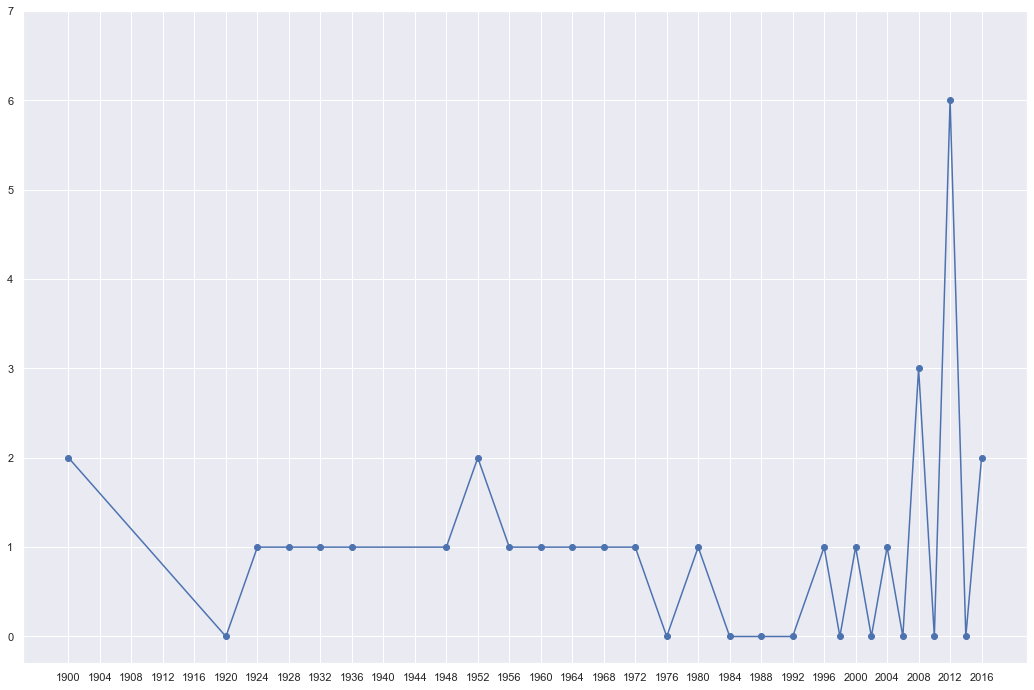

In [212]:
plt.plot(dfindyear.Year,dfindyear.allmedals)
plt.plot(dfindyear.Year,dfindyear.allmedals,'bo')
plt.yticks(range(0,8))
plt.xticks(range(1900,2018,4))
plt.show()


Not a great looking graph. 2012 is the best year for INDIA with 6 medals

In [213]:
groupedGender = pd.concat([df,pd.get_dummies(df.Sex)],axis=1).groupby(['Year','ID'],as_index = False).sum()

We have grouped using sum, it will sum the M/F columns for each ID which is not correct. Look at head to understand.

In [214]:
groupedGender[['Year','ID','F','M']].head()

,Year,ID,F,M
0,1896,1724,0,2
1,1896,1725,0,2
2,1896,4113,0,1
3,1896,4116,0,1
4,1896,4189,0,1


In [215]:
groupedGender.F = groupedGender.F.apply(lambda x: 0 if x==0 else 1)
groupedGender.M = groupedGender.M.apply(lambda x: 0 if x==0 else 1)

Now, look at the head of dataframe.

In [216]:
groupedGender[['Year','ID','F','M']].head()

,Year,ID,F,M
0,1896,1724,0,1
1,1896,1725,0,1
2,1896,4113,0,1
3,1896,4116,0,1
4,1896,4189,0,1


In [217]:
groupedGender = groupedGender.groupby('Year',as_index=False).sum()

In [218]:
# same code as mentioned above some where, the years of winter olympics after 1994 to be clubbed to their next summer olympics.
for i in l:
    groupedGender.loc[i,'Year'] = groupedGender.loc[i,'Year'] +2


To sum the newly edited Year columns [1994,1998,2002,2006,2010,2014]

In [219]:
groupedGender = groupedGender.groupby('Year',as_index=False).sum()

Text(0, 0.5, 'PARTICIPANTS')

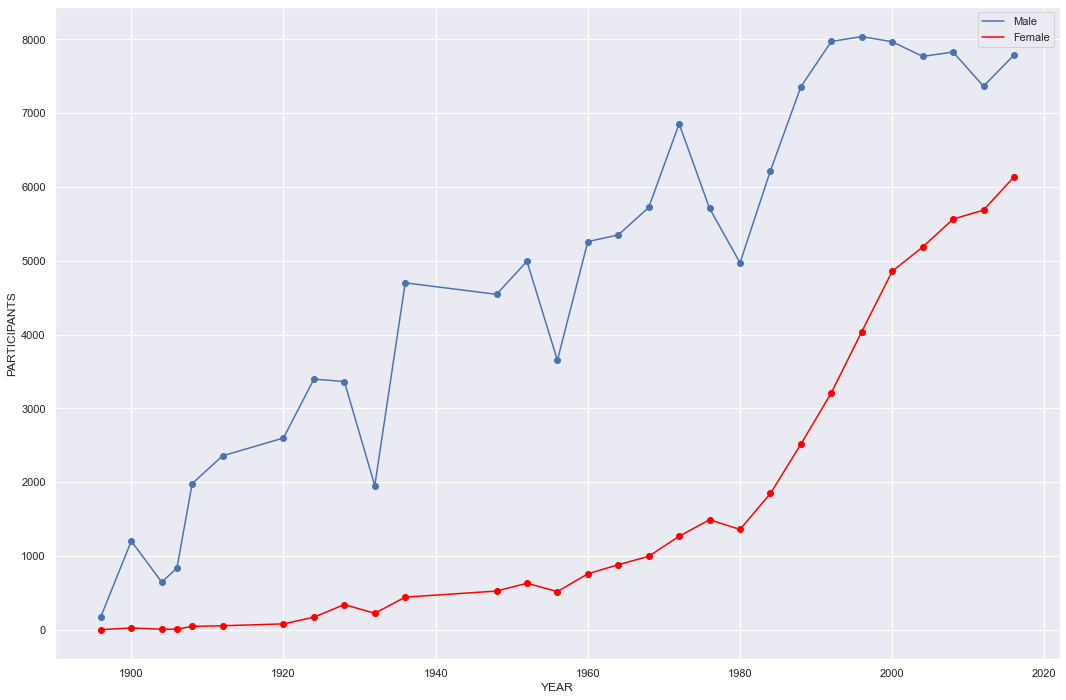

In [220]:
plt.plot(groupedGender.Year,groupedGender.M)
plt.plot(groupedGender.Year,groupedGender.F,color='red')

plt.plot(groupedGender.Year,groupedGender.M,'bo')
plt.plot(groupedGender.Year,groupedGender.F,'bo',color ='red')

plt.legend(['Male','Female'])
plt.xlabel("YEAR")
plt.ylabel("PARTICIPANTS")

One good thing to notice is that the female participants are greatly increasing every year. WOMEN EMPOWERMENT


 Comparing types of Medals won by Countries :


In [221]:
Medal_Types = df.groupby(['NOC', 'Medal'])['Medal'].count()
Medal_Types = Medal_Types.unstack(level = -1)
pd.DataFrame(Medal_Types)
Medal_Types = Medal_Types.reset_index(drop=False)
Medal_Types = Medal_Types.sort_values(by = ['Gold'], ascending = False)
Medal_Types = Medal_Types.head(20)
Medal_Types

Medal,NOC,Bronze,Gold,None,Silver
216,USA,1358.0,2638.0,13216.0,1641.0
214,URS,689.0,1082.0,3182.0,732.0
79,GER,746.0,745.0,7665.0,674.0
74,GBR,651.0,678.0,10188.0,739.0
100,ITA,531.0,575.0,9078.0,531.0
69,FRA,666.0,501.0,10981.0,610.0
193,SWE,535.0,479.0,6803.0,522.0
36,CAN,451.0,463.0,8381.0,438.0
90,HUN,371.0,432.0,5472.0,332.0
76,GDR,281.0,397.0,1640.0,327.0


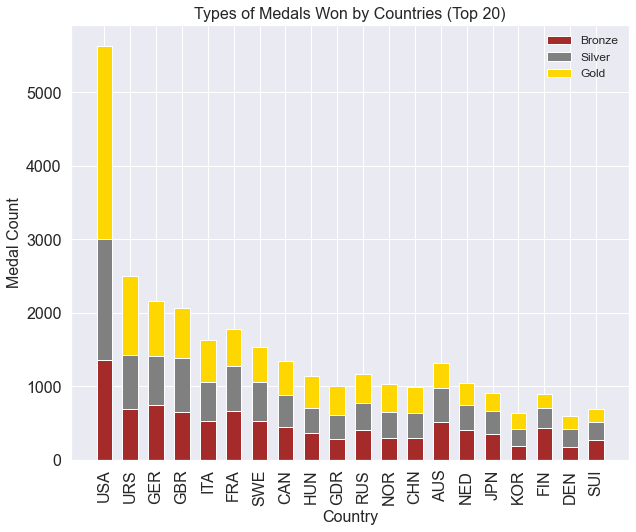

In [222]:
X_axis = Medal_Types['NOC']
configs = Medal_Types['NOC']
N = len(configs)
ind = np.arange(N)
width = 0.6
fig = plt.figure(figsize=(10,8))

bar_1 = plt.bar(ind, Medal_Types['Bronze'], width, color='brown' )
bar_2 = plt.bar(ind, Medal_Types['Silver'], width, Medal_Types['Bronze'], color='grey')
bar_3 = plt.bar(ind, Medal_Types['Gold'], width, np.array(Medal_Types['Bronze'])+np.array(Medal_Types['Silver']), color='gold')

plt.yticks(fontsize=16)
plt.ylabel('Medal Count', fontsize=16)
plt.xticks(ind, X_axis, fontsize=16, rotation=90)
plt.xlabel('Country', fontsize=16)
plt.title('Types of Medals Won by Countries (Top 20)',fontsize=16)
plt.legend((bar_1[0], bar_2[0], bar_3[0]), ('Bronze', 'Silver', 'Gold'), fontsize=12, ncol=1, framealpha=0, fancybox=True)
plt.show()    

# Draw a suitable chart which shows the performance of different cities belonging to Beijing, London, Sydney, Los Angeles.

In [223]:
df.City.unique() 

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

 - Performance of London

- Create new dataframe with only london records

In [224]:
dflosangles = df[df.City == "Los Angeles"]

In [225]:
dflosangles= pd.DataFrame(dflosangles)

#### The year india participated in London


In [226]:
sorted(dflosangles.Year.unique())

[1932, 1984]

### Number of Medal London won so far

In [227]:
print("Total number of all Medals London won",dflosangles['allmedals'].sum())

Total number of all Medals London won 2123


In [228]:
dflosangles[(dflosangles.Year== 1932) & (dflosangles.Gold ==1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
787,454,"Edgar Allen ""Ed"" Ablowich",M,19.0,182.00000,68.000000,United States,USA,1932 Summer,1932,...,Athletics,Athletics Men's 4 x 400 metres Relay,Gold,USA,NaN,0,1,0,0,1
2906,1619,Olle Erik Curys kerlund,M,20.0,175.33897,70.702393,Bissbi,SWE,1932 Summer,1932,...,Sailing,Sailing Mixed 6 metres,Gold,Sweden,NaN,0,1,0,0,1
5033,2864,Richard James Allen,M,30.0,172.00000,70.702393,India,IND,1932 Summer,1932,...,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0,0,1
6827,3828,John Franklin Anderson,M,25.0,191.00000,97.000000,United States,USA,1932 Summer,1932,...,Athletics,Athletics Men's Discus Throw,Gold,USA,NaN,0,1,0,0,1
9143,5027,"Edwin Yancey ""Eddie"" Argo",M,36.0,175.33897,70.702393,United States,USA,1932 Summer,1932,...,Equestrianism,"Equestrianism Men's Three-Day Event, Team",Gold,USA,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263646,131929,Frank Clifford Wykoff,M,22.0,178.00000,68.000000,United States,USA,1932 Summer,1932,...,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,USA,NaN,0,1,0,0,1
265927,133048,Takashi Yokoyama,M,18.0,175.33897,70.702393,Japan,JPN,1932 Summer,1932,...,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,Japan,NaN,0,1,0,0,1
266293,133226,Mahonri Mackintosh Young,M,54.0,175.33897,70.702393,United States,USA,1932 Summer,1932,...,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",Gold,USA,NaN,0,1,0,0,1
266896,133534,Masanori Yusa,M,17.0,175.33897,70.702393,Japan,JPN,1932 Summer,1932,...,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,Japan,NaN,0,1,0,0,1


In [229]:
#### Sports in which Losangles Won a medal

In [230]:
set(dflosangles[dflosangles.allmedals == 1].Sport.unique())

{'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Basketball',
 'Boxing',
 'Canoeing',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Football',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rhythmic Gymnastics',
 'Rowing',
 'Sailing',
 'Shooting',
 'Swimming',
 'Synchronized Swimming',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'}

In [231]:
dflosangles[(dflosangles.Gold==1) & (dflosangles.Sport == 'Shooting')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
44502,22947,Malcolm Douglas Cooper,M,36.0,170.00000,76.000000,Great Britain,GBR,1984 Summer,1984,...,Shooting,"Shooting Men's Small-Bore Rifle, Three Positio...",Gold,UK,NaN,0,1,0,0,1
58922,30153,"Matthew Alexander ""Matt"" Dryke",M,25.0,183.00000,75.000000,United States,USA,1984 Summer,1984,...,Shooting,Shooting Mixed Skeet,Gold,USA,NaN,0,1,0,0,1
65247,33396,"Edward Frederick ""Ed"" Etzel, Jr.",M,31.0,178.00000,66.000000,United States,USA,1984 Summer,1984,...,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",Gold,USA,NaN,0,1,0,0,1
79752,40501,Luciano Giovannetti,M,38.0,175.00000,78.000000,Italy,ITA,1984 Summer,1984,...,Shooting,Shooting Mixed Trap,Gold,Italy,NaN,0,1,0,0,1
92804,47019,Philippe Louis Marius Hbrle,M,21.0,179.00000,70.000000,France,FRA,1984 Summer,1984,...,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,France,NaN,0,1,0,0,1
112551,56997,Takeo Kamachi,M,48.0,164.00000,59.000000,Japan,JPN,1984 Summer,1984,...,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Gold,Japan,NaN,0,1,0,0,1
138536,69579,Li Yuwei,M,19.0,167.00000,63.000000,China,CHN,1984 Summer,1984,...,Shooting,"Shooting Men's Running Target, 50 metres",Gold,China,NaN,0,1,0,0,1
163550,82102,"Lorenzo ""Renzo"" Morigi",M,37.0,167.00000,70.702393,Italy,ITA,1932 Summer,1932,...,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Gold,Italy,NaN,0,1,0,0,1
203995,102419,Bertil Vilhelm Rnnmark,M,26.0,175.33897,70.702393,Sweden,SWE,1932 Summer,1932,...,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",Gold,Sweden,NaN,0,1,0,0,1
226882,114007,"Karen Patricia ""Pat"" Spurgin (-Pitney)",F,18.0,183.00000,79.000000,United States,USA,1984 Summer,1984,...,Shooting,"Shooting Women's Air Rifle, 10 metres",Gold,USA,NaN,0,1,0,0,1


In [232]:
#### Ploting london performance the world

In [233]:
dflos = dflosangles.copy()

In [234]:
dflosanglesyear = dflos.groupby(['Year','Event'])[["Year","Event"]]

###  Which olympic year had the highest number of olympians participating?

In [235]:
year_with_most_olampians = df.groupby(["Year"])["Name"].nunique()

In [236]:
year_with_most_olampians.sort_values(ascending = False).head()

Year
2016    11174
1992    11172
2008    10880
2000    10639
2004    10537
Name: Name, dtype: int64

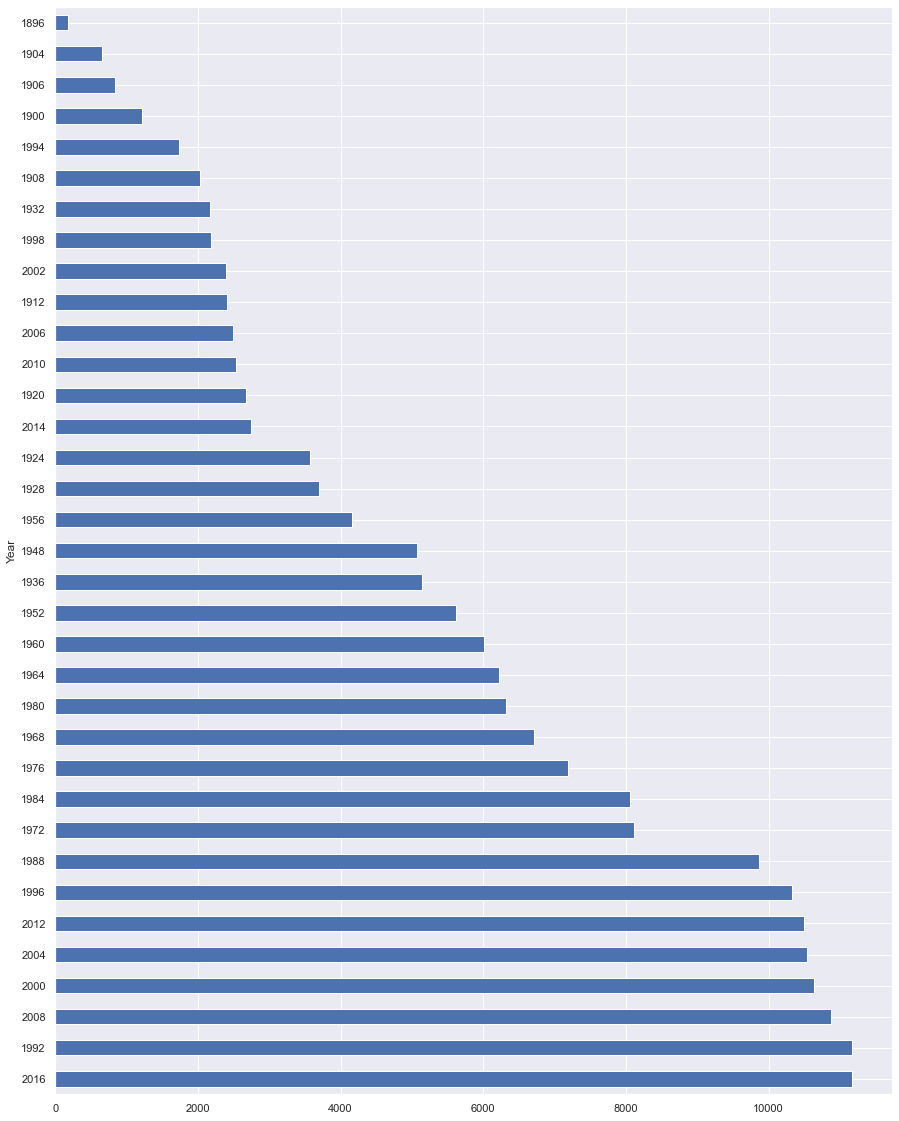

In [237]:
plt.figure(figsize=(15,20))
year_with_most_olampians.sort_values(ascending = False).plot(kind="barh")
plt.show()

In [238]:
#Assign the total number of 2016 olympians to a variable

olympians_2016 = df["Year"] == 2016

In [239]:
all_2016_olympians = df.loc[olympians_2016,"Name"].nunique()

In [240]:
print("The 2016 olympics had the highest number of olympians with a total of {} olympians".format(all_2016_olympians ))

The 2016 olympics had the highest number of olympians with a total of 11174 olympians


In [241]:
womenInOlympics = df[(df.Sex == 'F') & (df.Season == 'Summer')]
womenInOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,region,notes,Bronze,Gold,None,Silver,allmedals
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,...,Athletics,Athletics Women's 100 metres,None,Netherlands,NaN,0,0,1,0,0
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,...,Athletics,Athletics Women's 4 x 100 metres Relay,None,Netherlands,NaN,0,0,1,0,0
32,13,Minna Maarit Aalto,F,30.0,159.00000,55.500000,Finland,FIN,1996 Summer,1996,...,Sailing,Sailing Women's Windsurfer,None,Finland,NaN,0,0,1,0,0
33,13,Minna Maarit Aalto,F,34.0,159.00000,55.500000,Finland,FIN,2000 Summer,2000,...,Sailing,Sailing Women's Windsurfer,None,Finland,NaN,0,0,1,0,0
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.00000,70.702393,Norway,NOR,2008 Summer,2008,...,Handball,Handball Women's Handball,Gold,Norway,NaN,0,1,0,0,1
80,22,Andreea Aanei,F,22.0,170.00000,125.000000,Romania,ROU,2016 Summer,2016,...,Weightlifting,Weightlifting Women's Super-Heavyweight,None,Romania,NaN,0,0,1,0,0
91,29,Willemien Aardenburg,F,22.0,175.33897,70.702393,Netherlands,NED,1988 Summer,1988,...,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN,1,0,0,0,1
105,37,Ann Kristin Aarnes,F,23.0,182.00000,64.000000,Norway,NOR,1996 Summer,1996,...,Football,Football Women's Football,Bronze,Norway,NaN,1,0,0,0,1
135,49,Moonika Aava,F,24.0,168.00000,65.000000,Estonia,EST,2004 Summer,2004,...,Athletics,Athletics Women's Javelin Throw,None,Estonia,NaN,0,0,1,0,0
136,49,Moonika Aava,F,28.0,168.00000,65.000000,Estonia,EST,2008 Summer,2008,...,Athletics,Athletics Women's Javelin Throw,None,Estonia,NaN,0,0,1,0,0


Text(0.5, 1.0, 'Women medals per edition of the Games')

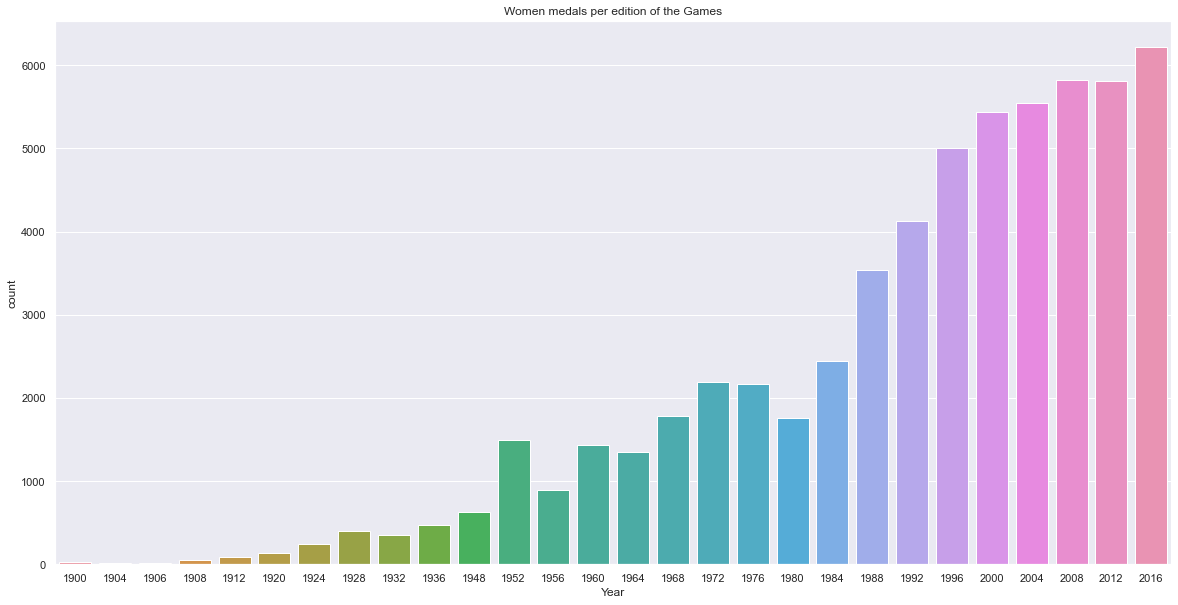

In [242]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')